In [1]:
# Import required libraries
import regex
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import os
import sklearn
from datetime import datetime
import gc
from itertools import product
import scipy
import warnings
%matplotlib inline
sns.set()
sns.set_style("whitegrid")
matplotlib.rcParams['figure.dpi'] = 50
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from datetime import datetime
from pandas.api.types import is_categorical_dtype
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings('ignore')

#Loading Files

Read Emission dataset files

In [2]:
# Loading the emission dataset
gaseous_emission_df = pd.read_csv('/content/edb-emissions-databank_gaseous_emission_and_smoke.csv')
nvpm_emission_df = pd.read_csv('/content/edb-emissions-databank_nvpm_emission.csv')

In [3]:
gaseous_emission_df.head()

,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Status,...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,1AS001,1.0,Allied Signal,TFE731-2-2B,NaN,TF,2.6,13.9,15.6,PR,...,01-04-1976,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1AS002,1.0,Allied Signal,TFE731-3,NaN,TF,2.6,14.3,16.5,PR,...,01-08-1976,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4AL003,4.0,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.2,18.1,33.7,C,...,19-04-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6AL004,6.0,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.1,16.6,31.5,C,...,19-04-1995,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6AL005,6.0,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.8,18.0,34.9,R,...,19-04-1995,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [4]:
gaseous_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 105 entries, UID No to Remark 8
dtypes: float64(76), object(29)
memory usage: 735.1+ KB


In [5]:
gaseous_emission_df.shape

(896, 105)

In [6]:
nvpm_emission_df.head()

,UID No,nvPMDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Superseded,...,Initial Test Date,Final Test Date,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,01P14RR101,1,Rolls-Royce plc,Trent 768,Phase5,MTF,5.2,34.5,304.3,NaN,...,02-06-2014,02-06-2014,Certification Report EDNS01000788666,The maximum EImass occurs between 30% and 85% Foo,The maximum EInum occurs between 30% and 85% Foo,NaN,NaN,NaN,NaN,NaN
1,01P14RR102,1,Rolls-Royce plc,Trent 772,Phase5,MTF,5.0,36.3,320.3,NaN,...,02-06-2014,02-06-2014,Certification Report EDNS01000788666,Data valid for Trent 772B and 772C,The maximum EImass occurs between 30% and 85% Foo,The maximum EInum occurs between 30% and 85% Foo,NaN,NaN,NaN,NaN
2,01P18RR103,1,Rolls-Royce plc,Trent 970-84,Phase5 Tiled,TF,8.5,38.0,338.7,NaN,...,18-11-2015,25-04-2016,Certification Report EDNS01000750023,The maximum EImass occurs between 30% and 85% Foo,NaN,NaN,NaN,NaN,NaN,NaN
3,01P18RR104,1,Rolls-Royce plc,Trent 972-84,Phase5 Tiled,TF,8.4,38.7,346.0,NaN,...,18-11-2015,25-04-2016,Certification Report EDNS01000750023,The maximum EImass occurs between 30% and 85% Foo,NaN,NaN,NaN,NaN,NaN,NaN
4,01P18RR105,1,Rolls-Royce plc,Trent 972E-84,Phase5 Tiled,TF,8.4,38.7,346.0,NaN,...,18-11-2015,25-04-2016,Certification Report EDNS01000750023,The maximum EImass occurs between 30% and 85% Foo,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nvpm_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 76 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   UID No                                                       214 non-null    object 
 1   nvPMDB No                                                    214 non-null    int64  
 2   Manufacturer                                                 214 non-null    object 
 3   Engine Identification                                        214 non-null    object 
 4   Combustor Description                                        211 non-null    object 
 5   Eng Type                                                     214 non-null    object 
 6   B/P Ratio                                                    214 non-null    float64
 7   Pressure Ratio                                               214 non-null    flo

In [8]:
nvpm_emission_df.shape

(214, 76)

Mergeer Dataset on 'UID NO' to analyse the emission of engines which are in both datasets.

In [9]:
import pandas as pd

# Merging of the dataframes based on the 'UID no' column
merged_data = pd.merge(gaseous_emission_df, nvpm_emission_df, on='UID No', suffixes=('', '_drop'))

# duplicate columns dropped for avoid unneccesary columns
for column in merged_data.columns:
    if column.endswith('_drop'):
        merged_data.drop(column, axis=1, inplace=True)

merged_data.head()

,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Status,...,LTOnum/Foo Characteristic (% of CAEP/11 NT Limit),nvPM LTO Total Particle Number (#),nvPM EImass_SL T/O (mg/kg),nvPM EImass_SL C/O (mg/kg),nvPM EImass_SL App (mg/kg),nvPM EImass_SL Idle (mg/kg),nvPM EInum_SL T/O (#/kg),nvPM EInum_SL C/O (#/kg),nvPM EInum_SL App (#/kg),nvPM EInum_SL Idle (#/kg)
0,01P06AL028,6.0,Rolls-Royce Corporation,AE3007A1,Type 3 (reduced emissions),MTF,4.8,18.0,34.9,C,...,25.3,7.690000e+16,48.3,39.8,12.7,25.7,6.750000e+14,7.960000e+14,1.240000e+15,2.480000e+15
1,01P06AL029,6.0,Rolls-Royce Corporation,AE3007A1/1,Type 3 (reduced emissions),MTF,4.8,17.9,34.7,C,...,25.3,7.690000e+16,48.3,39.8,12.7,25.7,6.750000e+14,7.960000e+14,1.240000e+15,2.480000e+15
2,01P06AL030,6.0,Rolls-Royce Corporation,AE3007A1/3,Type 3 (reduced emissions),MTF,4.8,17.2,33.1,C,...,26.1,7.690000e+16,46.5,37.6,12.9,26.3,7.150000e+14,8.190000e+14,1.280000e+15,2.570000e+15
3,01P06AL031,6.0,Rolls-Royce Corporation,AE3007A1P,Type 3 (reduced emissions),MTF,4.8,17.9,34.7,C,...,25.3,7.690000e+16,48.3,39.8,12.7,25.7,6.750000e+14,7.960000e+14,1.240000e+15,2.480000e+15
4,01P06AL032,6.0,Rolls-Royce Corporation,AE3007A1E,Type 3 (reduced emissions),MTF,4.7,19.1,37.2,C,...,24.1,7.690000e+16,50.8,43.0,12.6,24.9,6.000000e+14,7.520000e+14,1.200000e+15,2.370000e+15


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Columns: 148 entries, UID No to nvPM EInum_SL Idle (#/kg)
dtypes: float64(108), int64(11), object(29)
memory usage: 249.1+ KB


In [11]:
merged_data.shape

(214, 148)

In [12]:
# Extracting column names from the merged dataframe
column_names = merged_data.columns
column_names

for col_name in column_names:
    print(col_name)

UID No
GSDB No
Manufacturer
Engine Identification
Combustor Description
Eng Type
B/P Ratio
Pressure Ratio
Rated Thrust (kN)
Data Status
Data Superseded
Superseded by UID No
Test Engine Status
Data corr as Annex 16
Current Engine Status
Current Engine Status Date
HC EI T/O (g/kg)
HC EI C/O (g/kg)
HC EI App (g/kg)
HC EI Idle (g/kg)
HC Number Test
HC Number Eng
HC Dp/Foo Avg (g/kN)
HC Dp/Foo Sigma (g/kN)
HC Dp/Foo Min (g/kN)
HC Dp/Foo Max (g/kN)
HC Dp/Foo Characteristic (g/kN)
HC Dp/Foo Characteristic (% of Reg limit) 
HC LTO Total mass (g)
CO EI T/O (g/kg)
CO EI C/O (g/kg)
CO EI App (g/kg)
CO EI Idle (g/kg)
CO Number Test
CO Number Eng
CO Dp/Foo Avg (g/kN)
CO Dp/Foo Sigma (g/kN)
CO Dp/Foo Min (g/kN)
CO Dp/Foo Max (g/KN)
CO Dp/Foo Characteristic (g/kN)
CO Dp/Foo Characteristic (% of Reg limit) 
CO LTO Total Mass (g)
NOx EI T/O (g/kg)
NOx EI C/O (g/kg)
NOx EI App (g/kg)
NOx EI Idle (g/kg)
NOx Number Test
NOx Number Eng
NOx Dp/Foo Avg (g/kN)
NOx Dp/Foo Sigma (g/kN)
NOx Dp/Foo Min (g/kN)
NOx

In [13]:
#Save the merged dataframe to a CSV file
#merged_data.to_csv('merged_data.csv', index=False)
#from google.colab import files
#files.download("merged_data.csv")

Save Remaining dataset for Testing purpouse

In [14]:
remaining_df = gaseous_emission_df[~gaseous_emission_df['UID No'].isin(merged_data['UID No'])]
remaining_df.head()

,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Status,...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,1AS001,1.0,Allied Signal,TFE731-2-2B,NaN,TF,2.6,13.9,15.6,PR,...,01-04-1976,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1AS002,1.0,Allied Signal,TFE731-3,NaN,TF,2.6,14.3,16.5,PR,...,01-08-1976,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4AL003,4.0,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.2,18.1,33.7,C,...,19-04-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6AL004,6.0,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.1,16.6,31.5,C,...,19-04-1995,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6AL005,6.0,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.8,18.0,34.9,R,...,19-04-1995,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [15]:
remaining_df.shape

(682, 105)

In [16]:
import pandas as pd

# Check the missing values
missing_values_remaining = remaining_df.isnull().sum()

columns_with_missing_values_remaining = missing_values_remaining[missing_values_remaining > 0]

# Display column names and the sum of missing values
for column_name, missing_count in columns_with_missing_values_remaining.items():

    print(f"Column with missing values: {column_name}, Missing Values: {missing_count}")

Column with missing values: UID No, Missing Values: 63
Column with missing values: GSDB No, Missing Values: 63
Column with missing values: Manufacturer, Missing Values: 63
Column with missing values: Engine Identification, Missing Values: 63
Column with missing values: Combustor Description, Missing Values: 250
Column with missing values: Eng Type, Missing Values: 63
Column with missing values: B/P Ratio, Missing Values: 71
Column with missing values: Pressure Ratio, Missing Values: 63
Column with missing values: Rated Thrust (kN), Missing Values: 63
Column with missing values: Data Status, Missing Values: 64
Column with missing values: Data Superseded, Missing Values: 450
Column with missing values: Superseded by UID No, Missing Values: 450
Column with missing values: Test Engine Status, Missing Values: 63
Column with missing values: Data corr as Annex 16, Missing Values: 72
Column with missing values: Current Engine Status, Missing Values: 224
Column with missing values: Current Engi

# Basic Data Exploration

In [17]:
# Manufacturer and the number of engines based on unique "Engine Identification" values for each manufacturer

Manufracturer_engine = merged_data.groupby('Manufacturer')['Engine Identification'].nunique()

Manufracturer_engine = Manufracturer_engine.sort_values(ascending=False).reset_index()
Manufracturer_engine.columns = ['Manufacturer', 'Number of Engines']

Manufracturer_engine


,Manufacturer,Number of Engines
0,CFM International,40
1,General Electric Company,32
2,Pratt & Whitney,28
3,Rolls-Royce plc,28
4,Pratt & Whitney Canada,9
5,International Aero Engines,8
6,Rolls-Royce Corporation,7
7,Honeywell,6
8,Rolls-Royce Deutschland,4
9,PowerJet S.A.,2


In [18]:
# Count the number of unique engine types

Engine_type = merged_data['Eng Type'].value_counts().reset_index()

Engine_type.columns = ['Engine Type', 'Number of Engines']

Engine_type


,Engine Type,Number of Engines
0,TF,172
1,MTF,42


In [19]:
# Diffrentiate the unique combustor types

Combustor_type_counts = merged_data['Combustor Description'].value_counts().reset_index()

Combustor_type_counts.columns = ['Combustor Type', 'Number of Engines']

Combustor_type_counts


,Combustor Type,Number of Engines
0,Phase5 Tiled,41
1,"TALON X, Block-C",38
2,Tech Insertion,26
3,"TALON X, Block-D",16
4,LEC,15
5,TAPS II,14
6,TAPS,12
7,Floatwall,9
8,Type 3 (reduced emissions),7
9,SABER-1,6


# Exploaratory Data Analysis

Hydrocarbon Emission

In [20]:
# Extracting specified columns related to Hydrocarbon emission from the merged dataframe
HC = merged_data[['HC EI T/O (g/kg)', 'HC EI C/O (g/kg)', 'HC EI App (g/kg)', 'HC EI Idle (g/kg)',
                  'HC Number Test', 'HC Number Eng', 'HC Dp/Foo Avg (g/kN)', 'HC Dp/Foo Sigma (g/kN)',
                  'HC Dp/Foo Min (g/kN)', 'HC Dp/Foo Max (g/kN)', 'HC Dp/Foo Characteristic (g/kN)',
                  'HC LTO Total mass (g)']]

HC.head()


,HC EI T/O (g/kg),HC EI C/O (g/kg),HC EI App (g/kg),HC EI Idle (g/kg),HC Number Test,HC Number Eng,HC Dp/Foo Avg (g/kN),HC Dp/Foo Sigma (g/kN),HC Dp/Foo Min (g/kN),HC Dp/Foo Max (g/kN),HC Dp/Foo Characteristic (g/kN),HC LTO Total mass (g)
0,0.03,0.03,0.03,3.85,3.0,1.0,8.0,NaN,NaN,NaN,12.3,279.0
1,0.03,0.03,0.03,3.88,3.0,1.0,8.1,NaN,NaN,NaN,12.4,280.0
2,0.03,0.03,0.03,3.81,3.0,1.0,8.2,NaN,NaN,NaN,12.6,269.0
3,0.03,0.03,0.03,3.86,3.0,1.0,8.1,NaN,NaN,NaN,12.4,280.0
4,0.03,0.03,0.03,3.52,3.0,1.0,7.1,NaN,NaN,NaN,10.9,264.0


In [21]:
HC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HC EI T/O (g/kg)                 214 non-null    float64
 1   HC EI C/O (g/kg)                 214 non-null    float64
 2   HC EI App (g/kg)                 214 non-null    float64
 3   HC EI Idle (g/kg)                214 non-null    float64
 4   HC Number Test                   214 non-null    float64
 5   HC Number Eng                    214 non-null    float64
 6   HC Dp/Foo Avg (g/kN)             214 non-null    float64
 7   HC Dp/Foo Sigma (g/kN)           122 non-null    float64
 8   HC Dp/Foo Min (g/kN)             149 non-null    float64
 9   HC Dp/Foo Max (g/kN)             149 non-null    float64
 10  HC Dp/Foo Characteristic (g/kN)  214 non-null    float64
 11  HC LTO Total mass (g)            214 non-null    float64
dtypes: float64(12)
memory 

Text(0, 0.5, 'g/kg')

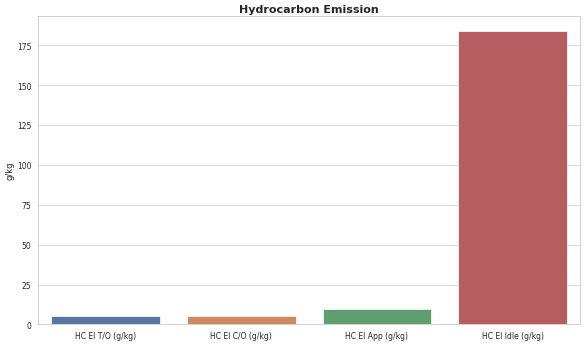

In [22]:
# Plot the histogram
plt.figure(figsize=(14,8))

# Add title
plt.title("Hydrocarbon Emission", fontsize=16, fontweight='bold')

# Calculate the hydrocarbon characteristics
HC_characteristic = HC[['HC EI T/O (g/kg)', 'HC EI C/O (g/kg)', 'HC EI App (g/kg)', 'HC EI Idle (g/kg)']].sum()

# Bar chart showing hydrocarbon emissions
sns.barplot(x=HC_characteristic.index, y=HC_characteristic)


plt.ylabel("g/kg")


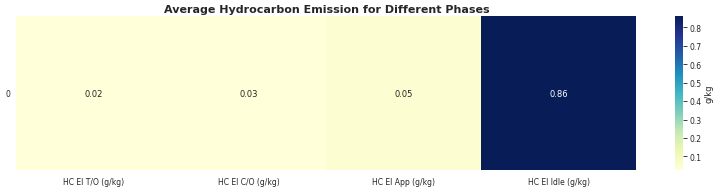

In [23]:
# Calculating hydrocarbon emission for different phases.
HC_mean = HC[['HC EI T/O (g/kg)', 'HC EI C/O (g/kg)', 'HC EI App (g/kg)', 'HC EI Idle (g/kg)']].mean()

# Converting the series to a DataFrame.
HC_matrix = HC_mean.to_frame().T


plt.figure(figsize=(20, 4))
sns.heatmap(HC_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'g/kg'})
plt.title("Average Hydrocarbon Emission for Different Phases",fontsize=16, fontweight='bold')
plt.yticks(rotation=0)
plt.show()


CO Emission

In [24]:
# Extracting specified columns related to Carbon Momoxide emission from the merged dataframe
CO = merged_data[['CO EI T/O (g/kg)','CO EI C/O (g/kg)','CO EI App (g/kg)','CO EI Idle (g/kg)','CO Number Test','CO Number Eng','CO Dp/Foo Avg (g/kN)','CO Dp/Foo Sigma (g/kN)','CO Dp/Foo Min (g/kN)','CO Dp/Foo Max (g/KN)','CO Dp/Foo Characteristic (g/kN)','CO LTO Total Mass (g)']]

In [25]:
CO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CO EI T/O (g/kg)                 214 non-null    float64
 1   CO EI C/O (g/kg)                 214 non-null    float64
 2   CO EI App (g/kg)                 214 non-null    float64
 3   CO EI Idle (g/kg)                214 non-null    float64
 4   CO Number Test                   214 non-null    float64
 5   CO Number Eng                    214 non-null    float64
 6   CO Dp/Foo Avg (g/kN)             214 non-null    float64
 7   CO Dp/Foo Sigma (g/kN)           122 non-null    float64
 8   CO Dp/Foo Min (g/kN)             149 non-null    float64
 9   CO Dp/Foo Max (g/KN)             149 non-null    float64
 10  CO Dp/Foo Characteristic (g/kN)  214 non-null    float64
 11  CO LTO Total Mass (g)            214 non-null    float64
dtypes: float64(12)
memory 

Text(0, 0.5, 'g/kg')

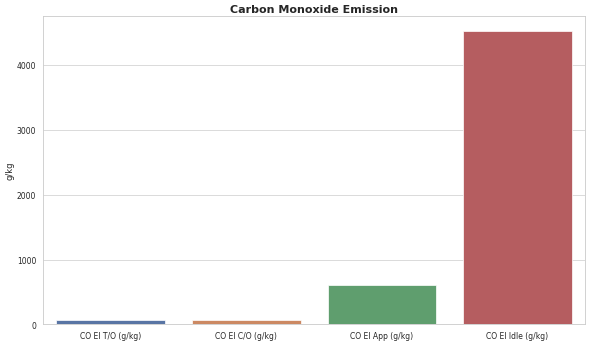

In [26]:
# Calculate the Carbon Monoxide characteristics
plt.figure(figsize=(14,8))

# Add title
plt.title("Carbon Monoxide Emission",fontsize=16, fontweight='bold')
CO_characteristic=CO[['CO EI T/O (g/kg)','CO EI C/O (g/kg)','CO EI App (g/kg)','CO EI Idle (g/kg)']].sum()
CO_characteristic

sns.barplot(x=CO_characteristic.index, y=CO_characteristic)

plt.ylabel("g/kg")

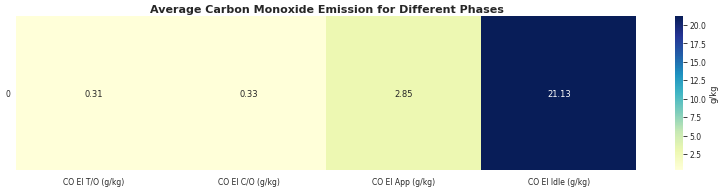

In [27]:
# Calculating the mean for CO emission for different phases
CO_mean = CO[['CO EI T/O (g/kg)', 'CO EI C/O (g/kg)', 'CO EI App (g/kg)', 'CO EI Idle (g/kg)']].mean()

# Converting the series to a DataFrame
CO_matrix = CO_mean.to_frame().T

# Plotting heatmap for Carbon Monoxide Emission
plt.figure(figsize=(20, 4))
sns.heatmap(CO_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'g/kg'})
plt.title("Average Carbon Monoxide Emission for Different Phases",fontsize=16, fontweight='bold')
plt.yticks(rotation=0)
plt.show()


NOx Emission

In [28]:
# Extracting specified columns related to Nitrates of emission from the merged dataframe
NO = merged_data[['NOx EI T/O (g/kg)','NOx EI C/O (g/kg)','NOx EI App (g/kg)','NOx EI Idle (g/kg)','NOx Number Test','NOx Number Eng','NOx Dp/Foo Avg (g/kN)','NOx Dp/Foo Sigma (g/kN)','NOx Dp/Foo Min (g/kN)','NOx Dp/Foo Max (g/kN)','NOx Dp/Foo Characteristic (g/kN)','NOx LTO Total mass (g)']]

In [29]:
NO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NOx EI T/O (g/kg)                 214 non-null    float64
 1   NOx EI C/O (g/kg)                 214 non-null    float64
 2   NOx EI App (g/kg)                 214 non-null    float64
 3   NOx EI Idle (g/kg)                214 non-null    float64
 4   NOx Number Test                   214 non-null    float64
 5   NOx Number Eng                    214 non-null    float64
 6   NOx Dp/Foo Avg (g/kN)             214 non-null    float64
 7   NOx Dp/Foo Sigma (g/kN)           122 non-null    float64
 8   NOx Dp/Foo Min (g/kN)             149 non-null    float64
 9   NOx Dp/Foo Max (g/kN)             149 non-null    float64
 10  NOx Dp/Foo Characteristic (g/kN)  214 non-null    float64
 11  NOx LTO Total mass (g)            214 non-null    float64
dtypes: float

Text(0, 0.5, 'g/kg')

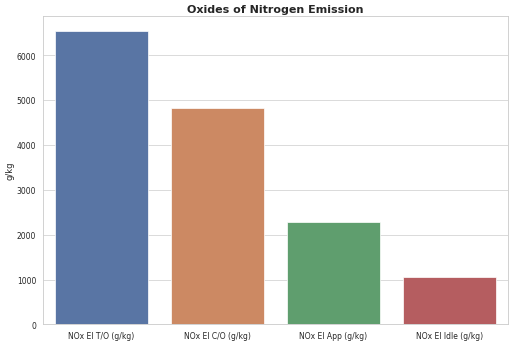

In [30]:
# Calculate the Nitrate of oxide characteristics
plt.figure(figsize=(12,8))
# Add title
plt.title("Oxides of Nitrogen Emission",fontsize=16, fontweight='bold')
no_characteristic= NO[['NOx EI T/O (g/kg)','NOx EI C/O (g/kg)','NOx EI App (g/kg)','NOx EI Idle (g/kg)']].sum()
no_characteristic

sns.barplot(x=no_characteristic.index, y=no_characteristic)

plt.ylabel("g/kg")

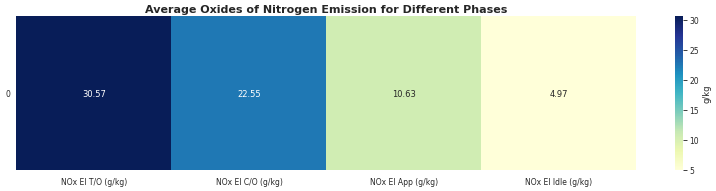

In [31]:
# Calculating the mean for NOx characteristics for different phases
no_mean = NO[['NOx EI T/O (g/kg)', 'NOx EI C/O (g/kg)', 'NOx EI App (g/kg)', 'NOx EI Idle (g/kg)']].mean()

# Converting the series to a DataFrame
no_matrix = no_mean.to_frame().T

# Plotting heatmap for Oxides of Nitrogen Emission
plt.figure(figsize=(20, 4))
sns.heatmap(no_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'g/kg'})
plt.title("Average Oxides of Nitrogen Emission for Different Phases",fontsize=16, fontweight='bold')
plt.yticks(rotation=0)
plt.show()


Smoke Number

In [32]:
# Extracting specified columns related to Smoke niumber from the merged dataframe
SN = merged_data[['SN T/O', 'SN C/O','SN App','SN Idle','SN Number Test','SN Number Eng','SN Max','SN Sigma','SN Range Min','SN Range Max','SN Characteristic','SN Characteristic (% of Reg limit)']]

In [33]:
SN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SN T/O                              213 non-null    float64
 1   SN C/O                              213 non-null    float64
 2   SN App                              213 non-null    float64
 3   SN Idle                             213 non-null    float64
 4   SN Number Test                      213 non-null    float64
 5   SN Number Eng                       213 non-null    float64
 6   SN Max                              213 non-null    float64
 7   SN Sigma                            122 non-null    float64
 8   SN Range Min                        149 non-null    float64
 9   SN Range Max                        149 non-null    float64
 10  SN Characteristic                   213 non-null    float64
 11  SN Characteristic (% of Reg limit)  213 non-n

Text(0, 0.5, 'g/kg')

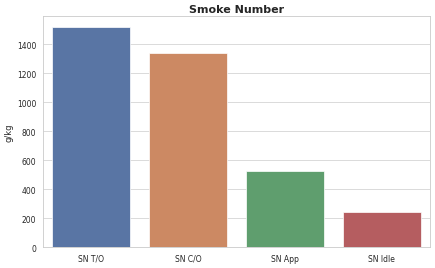

In [34]:
# Calculate the Nitrate of oxide characteristics
plt.figure(figsize=(10,6))
# Add title
plt.title("Smoke Number",fontsize=16, fontweight='bold')
sn_characteristic= SN[['SN T/O','SN C/O','SN App','SN Idle']].sum()
sn_characteristic

sns.barplot(x=sn_characteristic.index, y=sn_characteristic)
# Add label for vertical axis
plt.ylabel("g/kg")

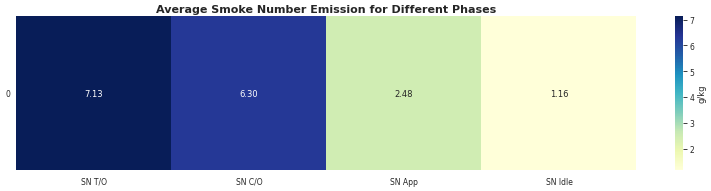

In [35]:
# Calculating the mean for Smoke Number characteristics for different phases
sn_mean = SN[['SN T/O', 'SN C/O', 'SN App', 'SN Idle']].mean()

# Converting the series to a DataFrame
sn_matrix = sn_mean.to_frame().T

# Plotting heatmap for Smoke Number Emission
plt.figure(figsize=(20, 4))
sns.heatmap(sn_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'g/kg'})
plt.title("Average Smoke Number Emission for Different Phases",fontsize=16, fontweight='bold')
plt.yticks(rotation=0)
plt.show()


NvPM Mass Emission

In [36]:
# Extracting specified columns related to nvPM EImass from the merged dataframe
NvPM_mass = merged_data[['nvPM Mass Concentration Max (mg/m³)','nvPM Mass Concentration Characteristic (mg/m³)','nvPM Mass Concentration Characteristic (% of CAEP/10 Limit)','nvPM Mass Concentration Number Test','nvPM Mass Concentration Number Eng','nvPM EImass T/O (mg/kg)','nvPM EImass C/O (mg/kg)','nvPM EImass App (mg/kg)','nvPM EImass Idle (mg/kg)','nvPM EImass Max (mg/kg)','nvPMmass Number Test','nvPMmass Number Eng','LTOmass/Foo Avg (mg/kN)','LTOmass/Foo Characteristic (mg/kN)','nvPM LTO Total Mass (mg)','nvPM EImass_SL T/O (mg/kg)','nvPM EImass_SL C/O (mg/kg)','nvPM EImass_SL App (mg/kg)','nvPM EImass_SL Idle (mg/kg)']]

In [37]:
NvPM_mass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   nvPM Mass Concentration Max (mg/m³)                          214 non-null    int64  
 1   nvPM Mass Concentration Characteristic (mg/m³)               214 non-null    int64  
 2   nvPM Mass Concentration Characteristic (% of CAEP/10 Limit)  214 non-null    float64
 3   nvPM Mass Concentration Number Test                          214 non-null    int64  
 4   nvPM Mass Concentration Number Eng                           214 non-null    int64  
 5   nvPM EImass T/O (mg/kg)                                      214 non-null    float64
 6   nvPM EImass C/O (mg/kg)                                      214 non-null    float64
 7   nvPM EImass App (mg/kg)                                      214 non-null    flo

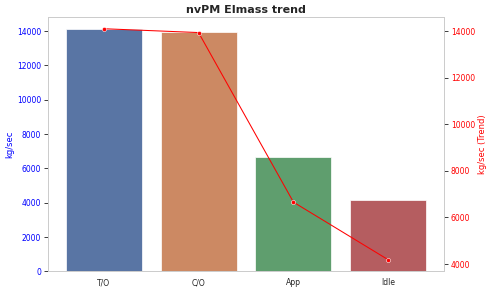

In [38]:
# Calculating the sum for the specified nvPM EImass columns

nvPM_characteristic = NvPM_mass[['nvPM EImass T/O (mg/kg)', 'nvPM EImass C/O (mg/kg)', 'nvPM EImass App (mg/kg)', 'nvPM EImass Idle (mg/kg)']].sum()

# Updated x-labels
x_labels = ['T/O', 'C/O', 'App', 'Idle']

# Setting up the figure and axis for visualization
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart (histogram) using the primary y-axis
sns.barplot(x=x_labels, y=nvPM_characteristic, ax=ax1, alpha=1)
ax1.set_ylabel('kg/sec', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("nvPM EImass trend", fontsize=16, fontweight='bold')

# Removing grid lines from the primary y-axis
ax1.grid(False)

# Line plot using a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=x_labels, y=nvPM_characteristic, ax=ax2, color='red', marker="o")
ax2.set_ylabel('kg/sec (Trend)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Removing grid lines from the secondary y-axis
ax2.grid(False)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


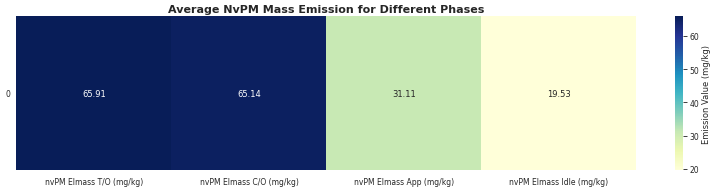

In [39]:
# Calculating the mean for NvPM Mass characteristics for different phases

nvpm_mass_mean = NvPM_mass[['nvPM EImass T/O (mg/kg)', 'nvPM EImass C/O (mg/kg)', 'nvPM EImass App (mg/kg)', 'nvPM EImass Idle (mg/kg)']].mean()

# Converting the series to a DataFrame
nvpm_mass = nvpm_mass_mean.to_frame().T

# Plotting the heatmap for NvPM Mass Emission
plt.figure(figsize=(20, 4))
sns.heatmap(nvpm_mass, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Emission Value (mg/kg)'})
plt.title("Average NvPM Mass Emission for Different Phases",fontsize=16, fontweight='bold')
plt.yticks(rotation=0)
plt.show()


NvPM Emission Number

In [40]:
# Extracting specified columns related to nvPM EInum from the merged dataframe
NvPM_number = merged_data[['nvPM EInum T/O (#/kg)','nvPM EInum C/O (#/kg)','nvPM EInum App (#/kg)','nvPM EInum Idle (#/kg)','nvPM EInum Max (#/kg)','nvPMnum Number Test','nvPMnum Number Eng','LTOnum/Foo Avg (#/kN)','LTOnum/Foo Characteristic (#/kN)','LTOnum/Foo Characteristic (% of CAEP/11 InP Limit)','LTOnum/Foo Characteristic (% of CAEP/11 NT Limit)','nvPM LTO Total Particle Number (#)','nvPM EInum_SL T/O (#/kg)','nvPM EInum_SL C/O (#/kg)','nvPM EInum_SL App (#/kg)','nvPM EInum_SL Idle (#/kg)']]

In [41]:
NvPM_number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   nvPM EInum T/O (#/kg)                               214 non-null    float64
 1   nvPM EInum C/O (#/kg)                               214 non-null    float64
 2   nvPM EInum App (#/kg)                               214 non-null    float64
 3   nvPM EInum Idle (#/kg)                              214 non-null    float64
 4   nvPM EInum Max (#/kg)                               214 non-null    float64
 5   nvPMnum Number Test                                 214 non-null    int64  
 6   nvPMnum Number Eng                                  214 non-null    int64  
 7   LTOnum/Foo Avg (#/kN)                               214 non-null    float64
 8   LTOnum/Foo Characteristic (#/kN)                    214 non-null    float64
 9  

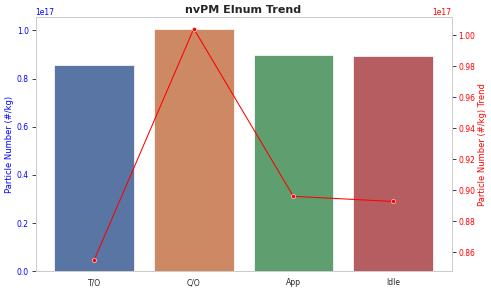

In [42]:
# Calculating the sum for the specified nvPM EInum columns

nvPM_number_characteristic = NvPM_number[['nvPM EInum T/O (#/kg)', 'nvPM EInum C/O (#/kg)', 'nvPM EInum App (#/kg)', 'nvPM EInum Idle (#/kg)']].sum()

# Updated x-labels
x_labels = ['T/O', 'C/O', 'App', 'Idle']

# Setting up the figure and axis for visualization
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart (histogram) using the primary y-axis
sns.barplot(x=x_labels, y=nvPM_number_characteristic, ax=ax1, alpha=1)
ax1.set_ylabel('Particle Number (#/kg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("nvPM EInum Trend", fontsize=16, fontweight='bold')

# Removing grid lines from the primary y-axis
ax1.grid(False)

# Line plot using a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=x_labels, y=nvPM_number_characteristic, ax=ax2, color='red', marker="o")
ax2.set_ylabel('Particle Number (#/kg) Trend', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Removing grid lines from the secondary y-axis
ax2.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Combine Emission through Heatmap

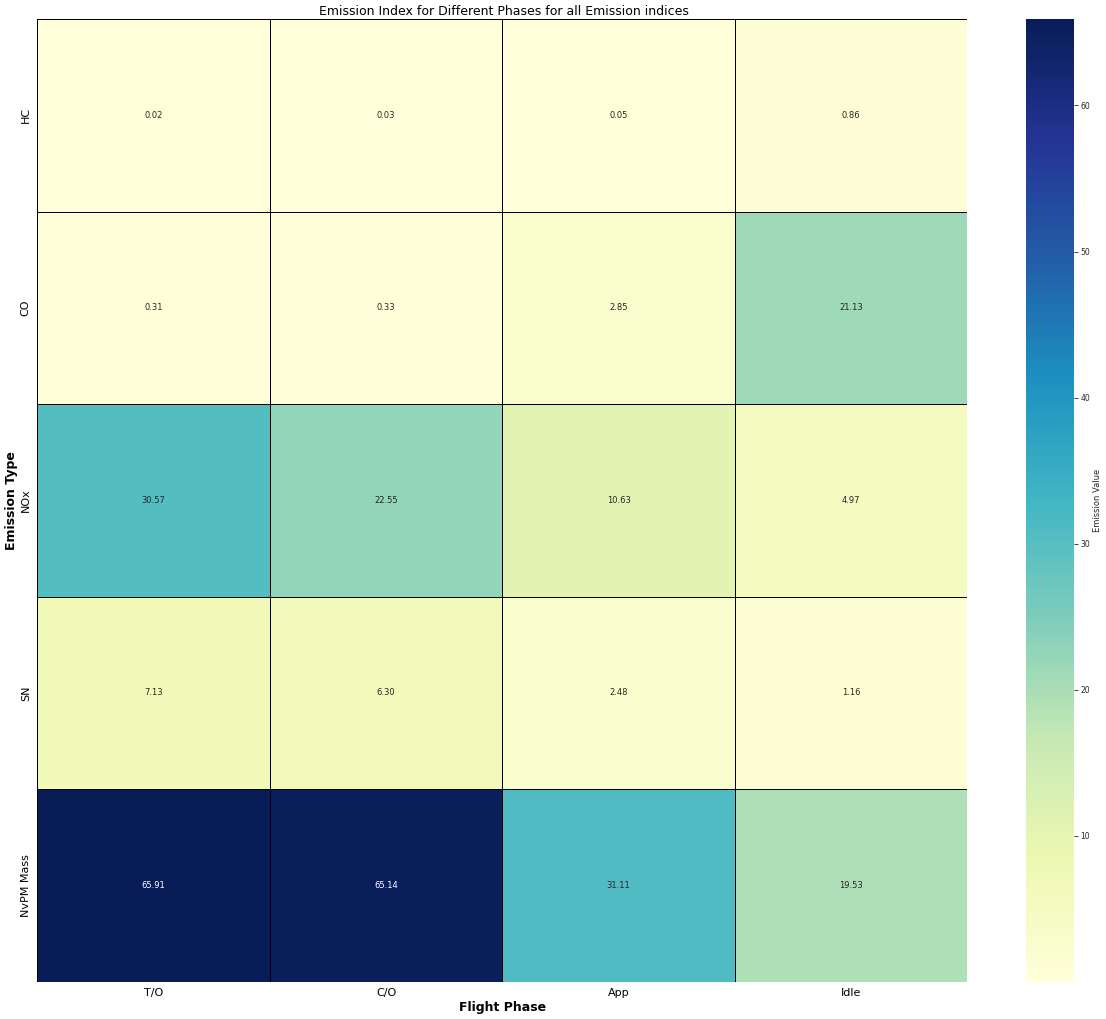

In [43]:
# Corrected code for consolidating the mean values for each emission type for the four flight phases

# Creating the dataframe
all_means_matrix_corrected = pd.DataFrame({
    'T/O': [HC_mean['HC EI T/O (g/kg)'], CO_mean['CO EI T/O (g/kg)'], no_mean['NOx EI T/O (g/kg)'],
            sn_mean['SN T/O'], nvpm_mass_mean['nvPM EImass T/O (mg/kg)']],

    'C/O': [HC_mean['HC EI C/O (g/kg)'], CO_mean['CO EI C/O (g/kg)'], no_mean['NOx EI C/O (g/kg)'],
            sn_mean['SN C/O'], nvpm_mass_mean['nvPM EImass C/O (mg/kg)']],

    'App': [HC_mean['HC EI App (g/kg)'], CO_mean['CO EI App (g/kg)'], no_mean['NOx EI App (g/kg)'],
            sn_mean['SN App'], nvpm_mass_mean['nvPM EImass App (mg/kg)']],

    'Idle': [HC_mean['HC EI Idle (g/kg)'], CO_mean['CO EI Idle (g/kg)'], no_mean['NOx EI Idle (g/kg)'],
             sn_mean['SN Idle'], nvpm_mass_mean['nvPM EImass Idle (mg/kg)']]
},
index=['HC', 'CO', 'NOx', 'SN', 'NvPM Mass'])

# Plotting the 5x4 matrix heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(all_means_matrix_corrected, annot=True, fmt=".2f", cmap="YlGnBu",
            cbar_kws={'label': 'Emission Value'}, linewidths=1, linecolor='black')

# title
plt.title(" Emission Index for Different Phases for all Emission indices", fontsize=18, color='black')

plt.xlabel("Flight Phase", fontsize=18, color='black', fontweight='bold')
plt.ylabel("Emission Type", fontsize=18, color='black', fontweight='bold')


plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')

plt.show()


Smoke vs NvPM

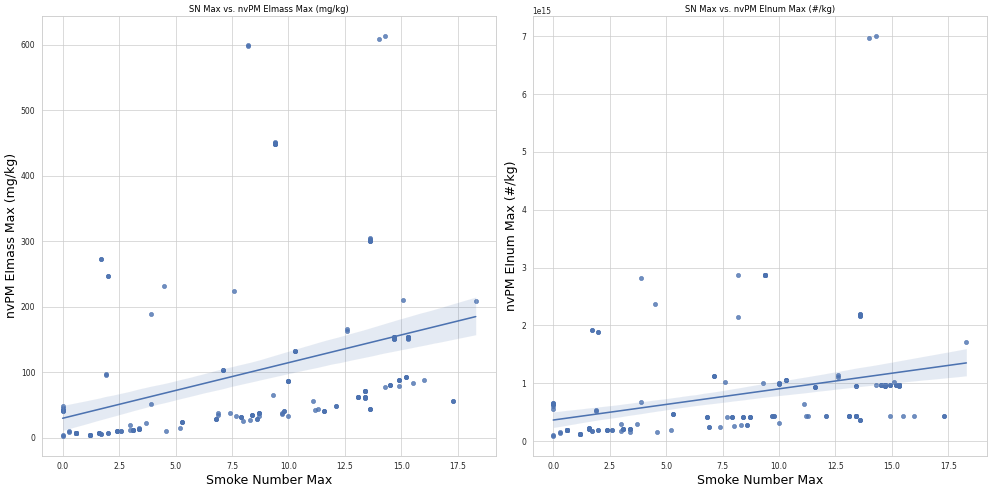

In [44]:

# Extracting the relevant columns for visualization
smoke_vs_nvPM = merged_data[['SN Max', 'nvPM EImass Max (mg/kg)', 'nvPM EInum Max (#/kg)']]

# Create a plot with a dark background
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.regplot(x='SN Max', y='nvPM EImass Max (mg/kg)', data=smoke_vs_nvPM)
plt.title('SN Max vs. nvPM EImass Max (mg/kg)', color='black')

# Customize x and y-axis labels with black color
plt.xlabel("Smoke Number Max", fontsize=18, color='black')
plt.ylabel("nvPM EImass Max (mg/kg)", fontsize=18, color='black')

# Plotting Smoke Number Max vs. nvPM EInum Max (#/kg)
plt.subplot(1, 2, 2)
sns.regplot(x='SN Max', y='nvPM EInum Max (#/kg)', data=smoke_vs_nvPM)
plt.title('SN Max vs. nvPM EInum Max (#/kg)', color='black')

# Customize x and y-axis labels with black color
plt.xlabel("Smoke Number Max", fontsize=18, color='black')
plt.ylabel("nvPM EInum Max (#/kg)", fontsize=18, color='black')

plt.tight_layout()
plt.show()



Plot of NvPM Mass & NvPM num with respect to rated thrust

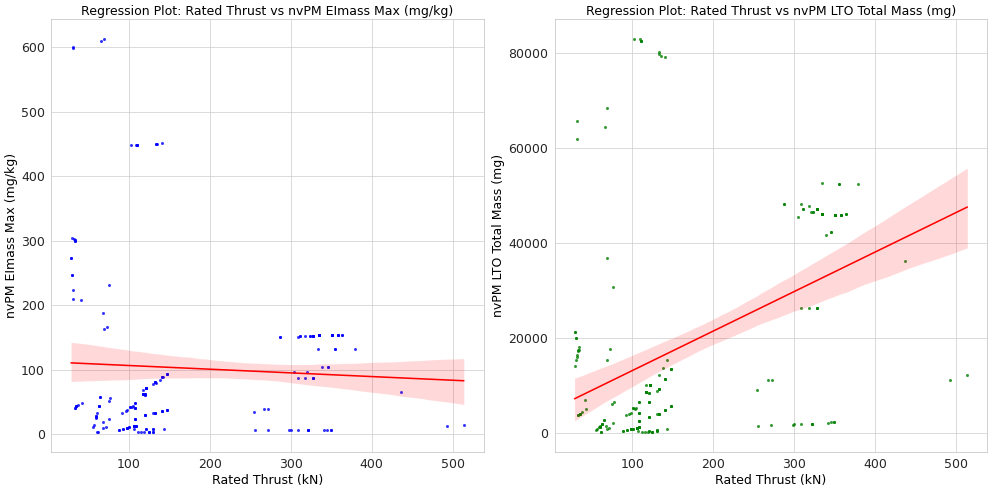

In [45]:
# Setting up the plotting environment for regression plots

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Regression plot for 'nvPM EImass Max (mg/kg)' vs 'Rated Thrust (kN)'

sns.regplot(data=merged_data, x='Rated Thrust (kN)', y='nvPM EImass Max (mg/kg)', ax=ax[0], color='blue', scatter_kws={'s': 10}, line_kws={"color": "red"})
ax[0].set_title('Regression Plot: Rated Thrust vs nvPM EImass Max (mg/kg)', color='black', fontsize=18)
ax[0].set_xlabel('Rated Thrust (kN)', color='black', fontsize=18)
ax[0].set_ylabel('nvPM EImass Max (mg/kg)', color='black', fontsize=18)
ax[0].tick_params(axis='both', labelsize=18)

# Regression plot for 'nvPM LTO Total Particle Number (#)' vs 'Rated Thrust (kN)'
sns.regplot(data=merged_data, x='Rated Thrust (kN)', y='nvPM LTO Total Mass (mg)', ax=ax[1], color='green', scatter_kws={'s': 10}, line_kws={"color": "red"})
ax[1].set_title('Regression Plot: Rated Thrust vs nvPM LTO Total Mass (mg)', color='black', fontsize=18)
ax[1].set_xlabel('Rated Thrust (kN)', color='black', fontsize=18)
ax[1].set_ylabel('nvPM LTO Total Mass (mg)', color='black', fontsize=18)
ax[1].tick_params(axis='both', labelsize=18)

# Adjust layout
plt.tight_layout()
plt.show()


Realtionship between NvPM Mass & NvPM num with respect to Fuel flow

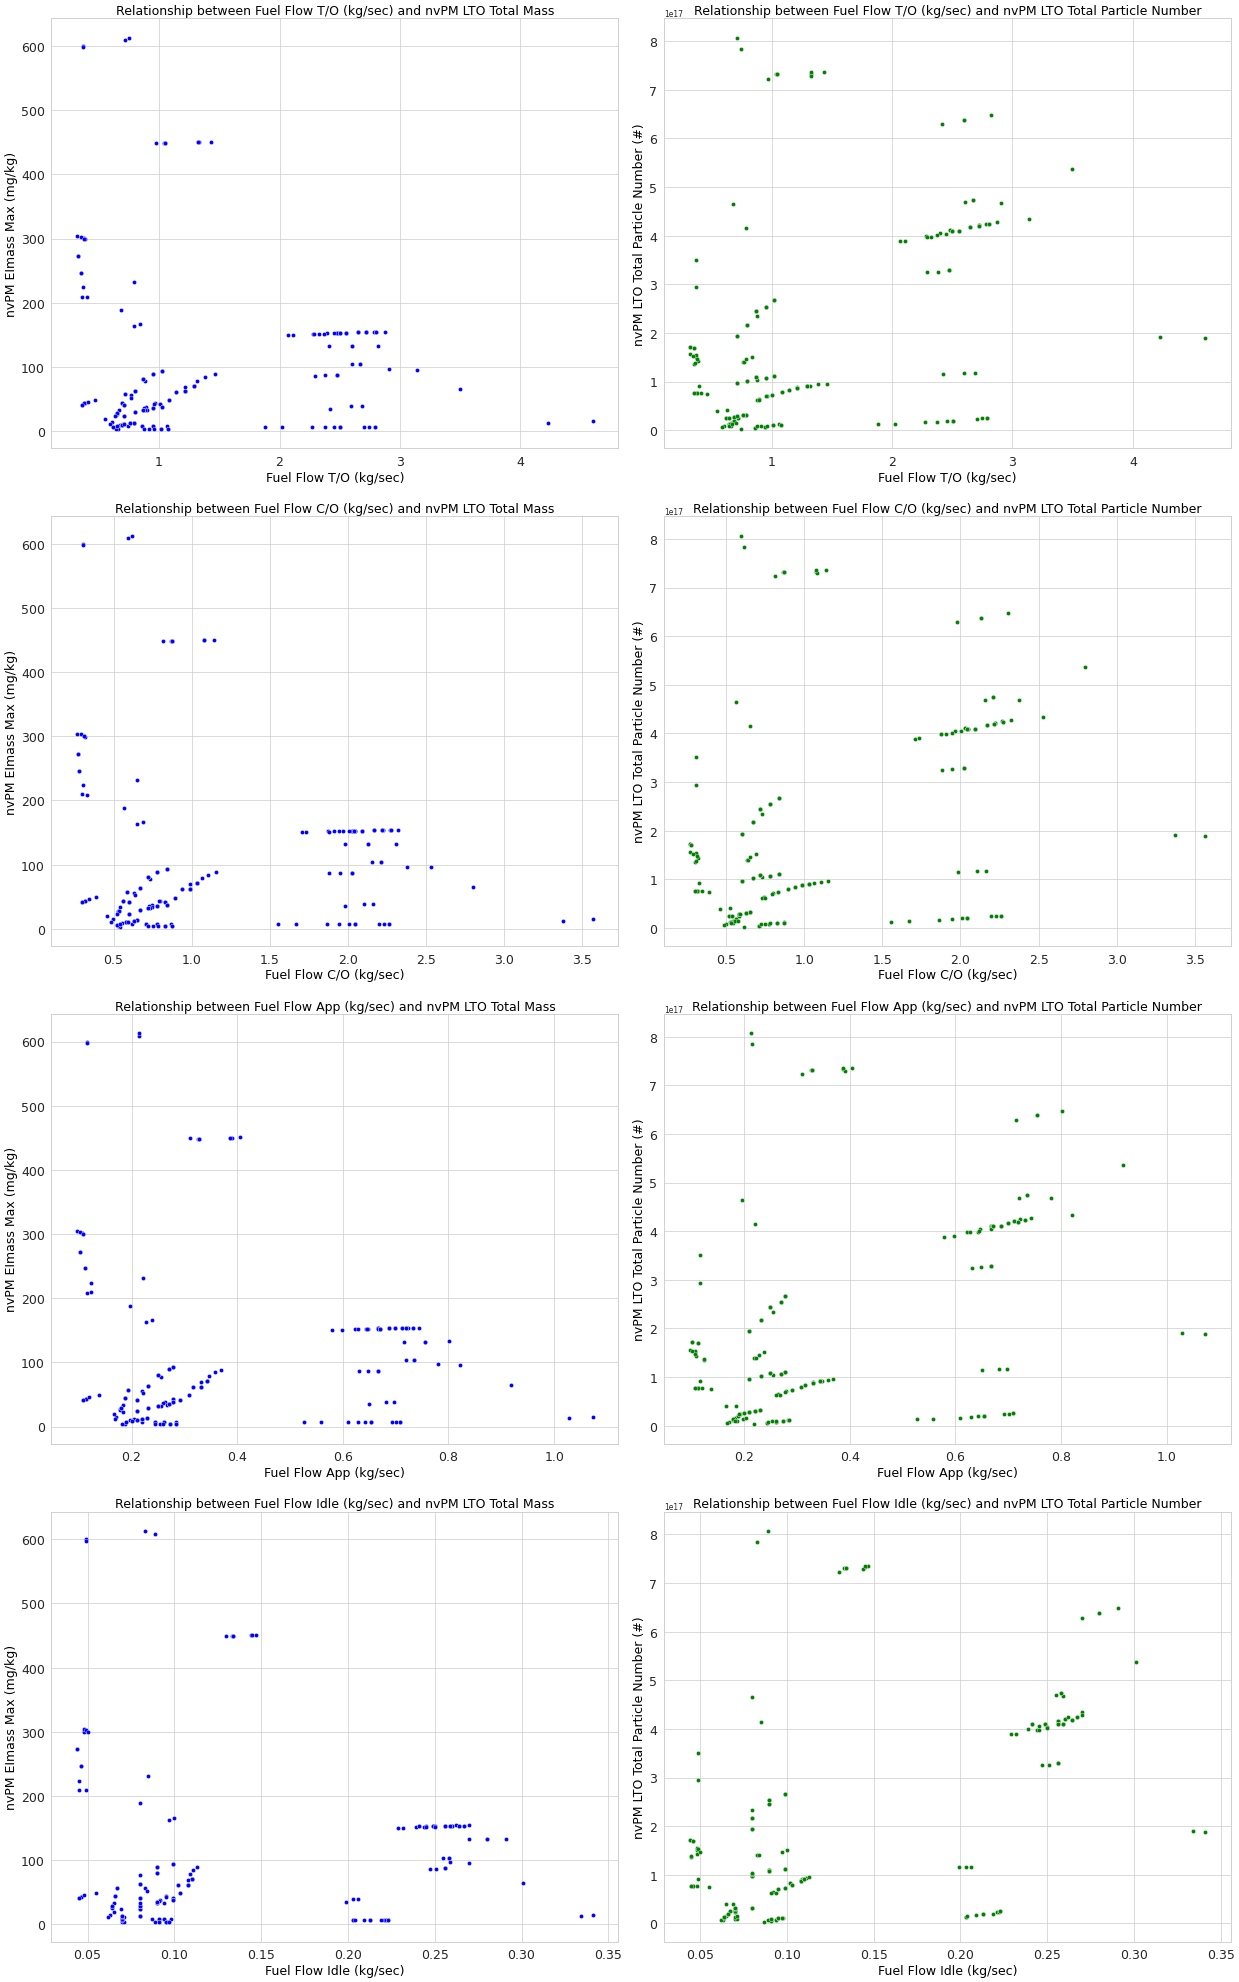

In [46]:
# Setting up the plotting environment for scatter plots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(25, 40))

fuel_flow_columns = ['Fuel Flow T/O (kg/sec)', 'Fuel Flow C/O (kg/sec)', 'Fuel Flow App (kg/sec)', 'Fuel Flow Idle (kg/sec)']

# Scatter plots for nvPM EImass Max  vs each phase of Fuel Flow
for i, col in enumerate(fuel_flow_columns):
    sns.scatterplot(data=merged_data, x=col, y='nvPM EImass Max (mg/kg)', ax=ax[i, 0], color='blue')
    ax[i, 0].set_title(f'Relationship between {col} and nvPM LTO Total Mass', color='black', fontsize=18)
    ax[i, 0].set_xlabel(col, color='black', fontsize=18)
    ax[i, 0].set_ylabel('nvPM EImass Max (mg/kg)', color='black', fontsize=18)
    ax[i, 0].tick_params(axis='both', labelsize=18)

# Scatter plots for nvPM LTO Total Particle Number vs each phase of Fuel Flow
for i, col in enumerate(fuel_flow_columns):
    sns.scatterplot(data=merged_data, x=col, y='nvPM LTO Total Particle Number (#)', ax=ax[i, 1], color='green')
    ax[i, 1].set_title(f'Relationship between {col} and nvPM LTO Total Particle Number', color='black', fontsize=18)
    ax[i, 1].set_xlabel(col, color='black', fontsize=18)
    ax[i, 1].set_ylabel('nvPM LTO Total Particle Number (#)', color='black', fontsize=18)
    ax[i, 1].tick_params(axis='both', labelsize=18)

# layout
plt.tight_layout()
plt.show()


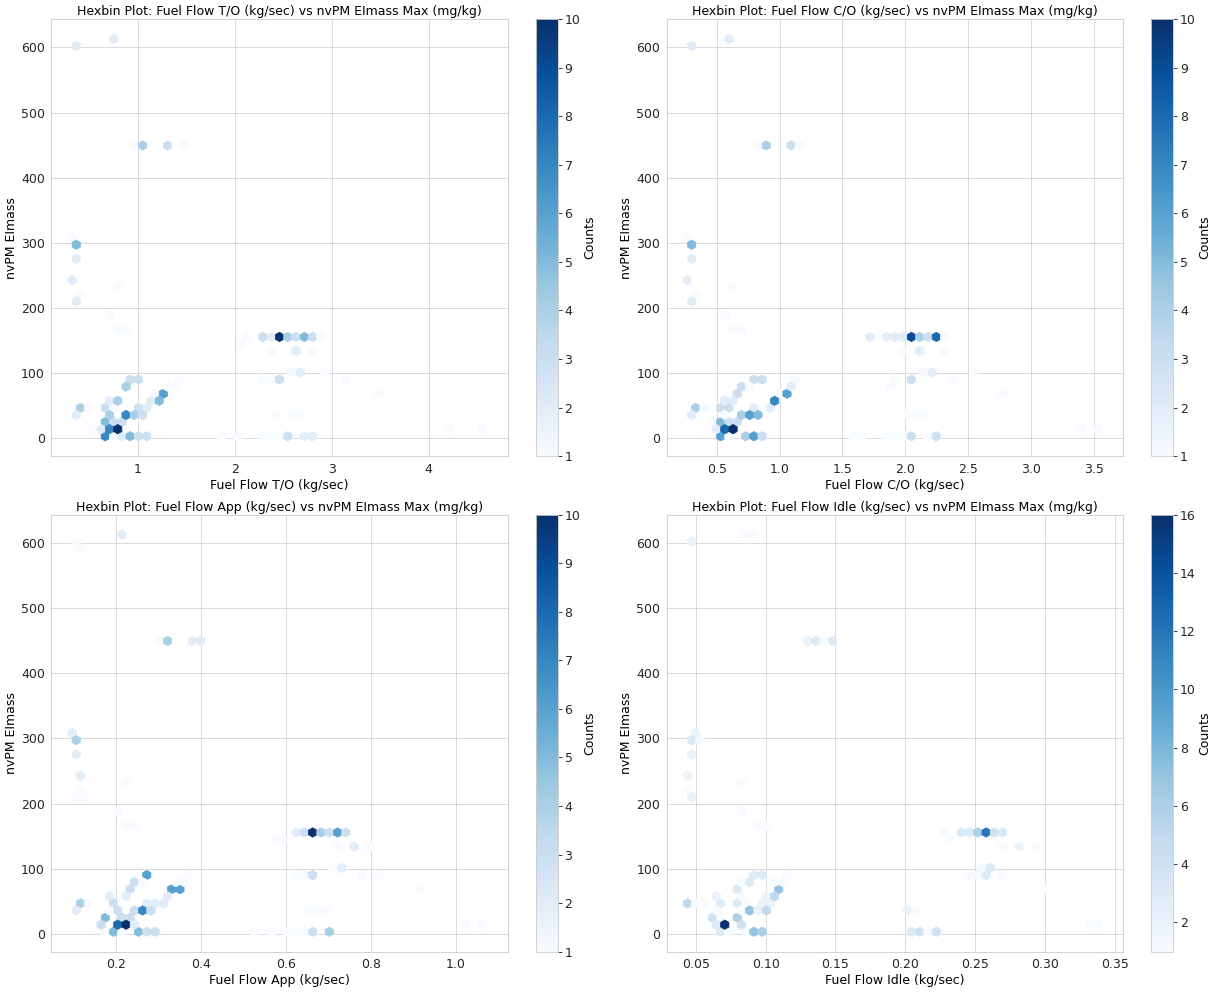

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))

fuel_flow_columns = ['Fuel Flow T/O (kg/sec)', 'Fuel Flow C/O (kg/sec)', 'Fuel Flow App (kg/sec)', 'Fuel Flow Idle (kg/sec)']

# Hexbin plots for nvPM EImass vs each phase of Fuel Flow

for fuel, col in enumerate(fuel_flow_columns):
    row, col_idx = divmod(fuel, 2)
    hb = ax[row, col_idx].hexbin(merged_data[col], merged_data['nvPM EImass Max (mg/kg)'], gridsize=50, cmap='Blues', mincnt=1)
    cb = plt.colorbar(hb, ax=ax[row, col_idx])
    ax[row, col_idx].set_title(f'Hexbin Plot: {col} vs nvPM EImass Max (mg/kg)', color='black', fontsize=18)  # Increased font size
    ax[row, col_idx].set_xlabel(col, color='black', fontsize=18)  # Increased font size
    ax[row, col_idx].set_ylabel('nvPM EImass', color='black', fontsize=18)  # Increased font size
    ax[row, col_idx].tick_params(axis='both', labelsize=18)  # Increased font size for tick labels
    cb.set_label('Counts', color='black', fontsize=18)  # Increased font size for colorbar label
    cb.ax.tick_params(labelsize=18)  # Increased font size for colorbar ticks

# Adjust layout
plt.tight_layout()
plt.show()




Realtionship of Emission Of NvPM Mass & NvPM num with respect to Fuel content

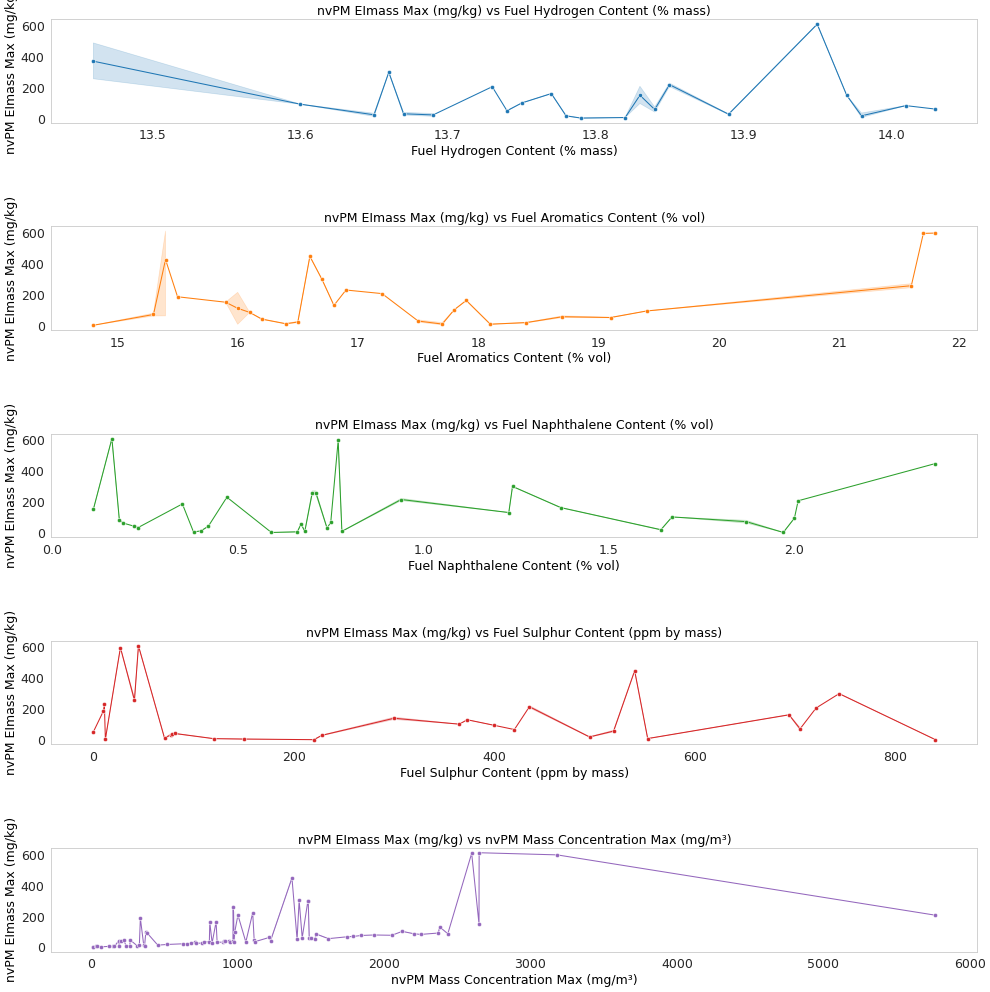

In [48]:
# Specified variables for plotting fuel content
fuel_content = ['Fuel Hydrogen Content (% mass)', 'Fuel Aromatics Content (% vol)', 'Fuel Naphthalene Content (% vol)',
             'Fuel Sulphur Content (ppm by mass)', 'nvPM Mass Concentration Max (mg/m³)']

# define the color palette
colors = sns.color_palette("tab10", len(fuel_content))

# Setting up the plotting environment for individual plots for each variable
fig, axes = plt.subplots(nrows=len(fuel_content), figsize=(20, 20))

# Creating individual line plots for each variable
for line_plot, col in enumerate(fuel_content):
    sns.lineplot(data=merged_data, x=col, y='nvPM EImass Max (mg/kg)', ax=axes[line_plot], color=colors[line_plot], marker="o")
    axes[line_plot].set_title(f'nvPM EImass Max (mg/kg) vs {col}', fontsize=18, color='black')
    axes[line_plot].set_xlabel(col, color='black', fontsize=18)
    axes[line_plot].set_ylabel('nvPM EImass Max (mg/kg)', color='black', fontsize=18)
    axes[line_plot].tick_params(axis='both', labelsize=18)
    axes[line_plot].grid(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()


Relationship of emission with respect to Engine type

Relationship of emission with respect to Manufacturer

#Data Cleaning

Keep Important columns to prediction of NvPM emission

In [49]:
# Extracting column names from the cleaned dataframe
column_names = merged_data.columns
column_names

for col_name in column_names:
    print(col_name)

UID No
GSDB No
Manufacturer
Engine Identification
Combustor Description
Eng Type
B/P Ratio
Pressure Ratio
Rated Thrust (kN)
Data Status
Data Superseded
Superseded by UID No
Test Engine Status
Data corr as Annex 16
Current Engine Status
Current Engine Status Date
HC EI T/O (g/kg)
HC EI C/O (g/kg)
HC EI App (g/kg)
HC EI Idle (g/kg)
HC Number Test
HC Number Eng
HC Dp/Foo Avg (g/kN)
HC Dp/Foo Sigma (g/kN)
HC Dp/Foo Min (g/kN)
HC Dp/Foo Max (g/kN)
HC Dp/Foo Characteristic (g/kN)
HC Dp/Foo Characteristic (% of Reg limit) 
HC LTO Total mass (g)
CO EI T/O (g/kg)
CO EI C/O (g/kg)
CO EI App (g/kg)
CO EI Idle (g/kg)
CO Number Test
CO Number Eng
CO Dp/Foo Avg (g/kN)
CO Dp/Foo Sigma (g/kN)
CO Dp/Foo Min (g/kN)
CO Dp/Foo Max (g/KN)
CO Dp/Foo Characteristic (g/kN)
CO Dp/Foo Characteristic (% of Reg limit) 
CO LTO Total Mass (g)
NOx EI T/O (g/kg)
NOx EI C/O (g/kg)
NOx EI App (g/kg)
NOx EI Idle (g/kg)
NOx Number Test
NOx Number Eng
NOx Dp/Foo Avg (g/kN)
NOx Dp/Foo Sigma (g/kN)
NOx Dp/Foo Min (g/kN)
NOx

Selection of Important feature based on domain Knowledge :
we are taking the columns related to engine which plays important role in the emission process.

In [50]:
# Columns you want to keep
columns_to_keep = ['Fuel LTO Cycle (kg)  ', 'Fuel H/C Ratio Min', 'Fuel H/C Ratio Max', 'Fuel Arom Min (%)',
                   'Fuel Arom Max (%)', 'Combustor Description', 'Eng Type', 'B/P Ratio',
                   'Pressure Ratio', 'Rated Thrust (kN)', 'Fuel Flow T/O (kg/sec)', 'Fuel Flow C/O (kg/sec)',
                   'Fuel Flow App (kg/sec)', 'Fuel Flow Idle (kg/sec)',
                   'nvPM EImass Max (mg/kg)', 'nvPM EInum Max (#/kg)', 'nvPM LTO Total Mass (mg)',
                   'nvPM LTO Total Particle Number (#)', 'Ambient Baro Min (kPa)', 'Ambient Baro Max (kPa)',
                   'Ambient Temp Min (K)', 'Ambient Temp Max (K)', 'Humidity Min (kg/kg)', 'Humidity Max (kg/kg)','HC LTO Total mass (g)','CO LTO Total Mass (g)','NOx LTO Total mass (g)','SN Max']

# Extract only the specified columns to create a new DataFrame
new_df = merged_data[columns_to_keep]


In [51]:
# Extracting column names from the cleaned dataframe
column_names = new_df.columns
column_names

for col_name in column_names:
    print(col_name)

Fuel LTO Cycle (kg)  
Fuel H/C Ratio Min
Fuel H/C Ratio Max
Fuel Arom Min (%)
Fuel Arom Max (%)
Combustor Description
Eng Type
B/P Ratio
Pressure Ratio
Rated Thrust (kN)
Fuel Flow T/O (kg/sec)
Fuel Flow C/O (kg/sec)
Fuel Flow App (kg/sec)
Fuel Flow Idle (kg/sec)
nvPM EImass Max (mg/kg)
nvPM EInum Max (#/kg)
nvPM LTO Total Mass (mg)
nvPM LTO Total Particle Number (#)
Ambient Baro Min (kPa)
Ambient Baro Max (kPa)
Ambient Temp Min (K)
Ambient Temp Max (K)
Humidity Min (kg/kg)
Humidity Max (kg/kg)
HC LTO Total mass (g)
CO LTO Total Mass (g)
NOx LTO Total mass (g)
SN Max


In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fuel LTO Cycle (kg)                 214 non-null    float64
 1   Fuel H/C Ratio Min                  214 non-null    float64
 2   Fuel H/C Ratio Max                  214 non-null    float64
 3   Fuel Arom Min (%)                   214 non-null    float64
 4   Fuel Arom Max (%)                   214 non-null    float64
 5   Combustor Description               211 non-null    object 
 6   Eng Type                            214 non-null    object 
 7   B/P Ratio                           214 non-null    float64
 8   Pressure Ratio                      214 non-null    float64
 9   Rated Thrust (kN)                   214 non-null    float64
 10  Fuel Flow T/O (kg/sec)              214 non-null    float64
 11  Fuel Flow C/O (kg/sec)              214 non-n

In [53]:
new_df.shape

(214, 28)

Correlation matrix :  this matrix will give us the corelation between the variables to identify the patterns.

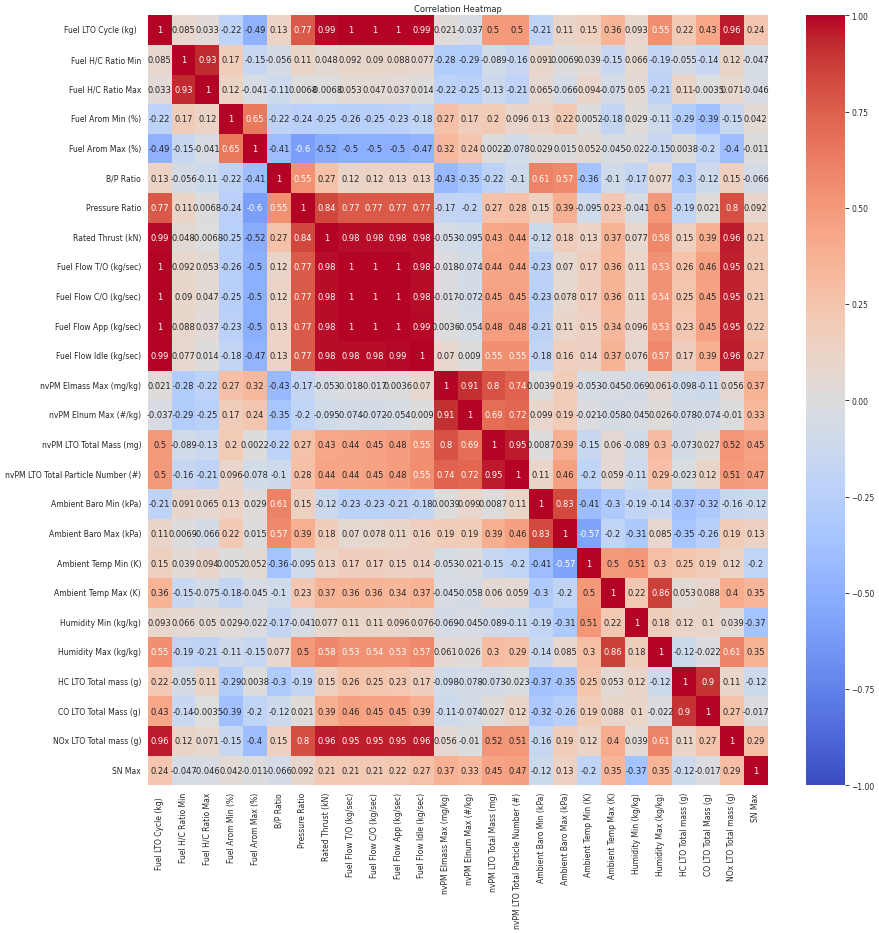

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = new_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides insights into how various variables in the new_df dataframe are related to each other. Here are some observations from the heatmap:

Strong Positive Correlations:

Fuel Flow T/O (kg/sec), Fuel Flow C/O (kg/sec), Fuel Flow App (kg/sec), and Fuel Flow Idle (kg/sec) all show strong positive correlations with each other. This suggests that when fuel flow in one phase of the cycle increases, it's likely that fuel flow in the other phases will also increase.
nvPM EImass Max (mg/kg) and nvPM LTO Total Mass (mg) show a strong positive correlation, suggesting that engines with higher emission indices for mass are likely to have higher total emissions during the LTO cycle.
Fuel Arom Min (%) and Fuel Arom Max (%) are positively correlated, which is expected as they represent the range of aromatic content in fuel.
Strong Negative Correlations:

Pressure Ratio and B/P Ratio have a negative correlation. A higher bypass ratio typically means a lower pressure ratio and vice versa.
Rated Thrust (kN) has a negative correlation with nvPM EInum Max (#/kg). This may suggest that engines with higher thrust ratings tend to have lower emission indices in terms of particle number.
Notable Insights:

nvPM LTO Total Particle Number (#) and nvPM LTO Total Mass (mg) have a positive correlation, indicating that engines with higher mass emissions during the LTO cycle also tend to have higher particle number emissions.
Environmental factors like Ambient Baro Min (kPa), Ambient Baro Max (kPa), Ambient Temp Min (K), Ambient Temp Max (K), Humidity Min (kg/kg), and Humidity Max (kg/kg) do not show strong correlations with emission metrics, suggesting that they may not play a dominant role in determining emissions for this dataset.
The Fuel Hydrogen Content (% mass), Fuel Aromatics Content (% vol), Fuel Naphthalene Content (% vol), and Fuel Sulphur Content (ppm by mass) don't show strong correlations with the emission metrics, suggesting that their influence on nvPM emissions may be complex or interrelated with other factors.
It's important to note that while correlation indicates a linear relationship between variables, it doesn't imply causation. Additionally, the absence of a strong correlation doesn't mean that there isn't any relationship; the relationship might be non-linear or influenced by other factors.

Missing value check

In [55]:
import pandas as pd

# Check the missing values
missing_values_sum = new_df.isnull().sum()

columns_with_missing_values = missing_values_sum[missing_values_sum > 0]

# Display column names and the sum of missing values
for column_name, missing_count in columns_with_missing_values.items():

    print(f"Column with missing values: {column_name}, Missing Values: {missing_count}")

Column with missing values: Combustor Description, Missing Values: 3
Column with missing values: SN Max, Missing Values: 1


In [56]:
# Drop rows with missing values from the new_df dataframe
new_df.dropna(inplace=True)

# check shape again
new_df.shape


(210, 28)

Encoding categorical variables

In [57]:
# Check for categorical variables in the new_df dataframe
categorical_columns = new_df.select_dtypes(include=['object']).columns

# Creating list
categorical_columns_list = list(categorical_columns)
categorical_columns_list

['Combustor Description', 'Eng Type']

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns_list:
    new_df[col] = le.fit_transform(new_df[col])

# Check the first few rows of the dataframe after label encoding
encoded_label_df_head = new_df.head()
encoded_label_df_head


,Fuel LTO Cycle (kg),Fuel H/C Ratio Min,Fuel H/C Ratio Max,Fuel Arom Min (%),Fuel Arom Max (%),Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Ambient Baro Min (kPa),Ambient Baro Max (kPa),Ambient Temp Min (K),Ambient Temp Max (K),Humidity Min (kg/kg),Humidity Max (kg/kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g),SN Max
0,157.0,1.9,1.9,16.0,20.0,17,0,4.8,18.0,34.9,...,98.9,99.0,291.0,301.0,0.009,0.012,279.0,3088.0,1344.0,0.0
1,156.0,1.9,1.9,16.0,20.0,17,0,4.8,17.9,34.7,...,98.9,99.0,291.0,301.0,0.009,0.012,280.0,3088.0,1333.0,0.0
2,151.0,1.9,1.9,16.0,20.0,17,0,4.8,17.2,33.1,...,98.9,99.0,291.0,301.0,0.009,0.012,269.0,2919.0,1245.0,0.0
3,157.0,1.9,1.9,16.0,20.0,17,0,4.8,17.9,34.7,...,98.9,99.0,291.0,301.0,0.009,0.012,280.0,3087.0,1334.0,0.0
4,165.0,1.9,1.9,16.0,20.0,17,0,4.7,19.1,37.2,...,98.9,99.0,291.0,301.0,0.009,0.012,264.0,3018.0,1501.0,0.0


In [59]:
new_df['Combustor Description'].unique()

array([17,  0,  5, 18, 16, 15,  9,  3,  1, 14,  8,  2, 11, 12, 13, 10,  4,
        6,  7])

In [60]:
new_df['Eng Type'].unique()

array([0, 1])

Check for Outliers

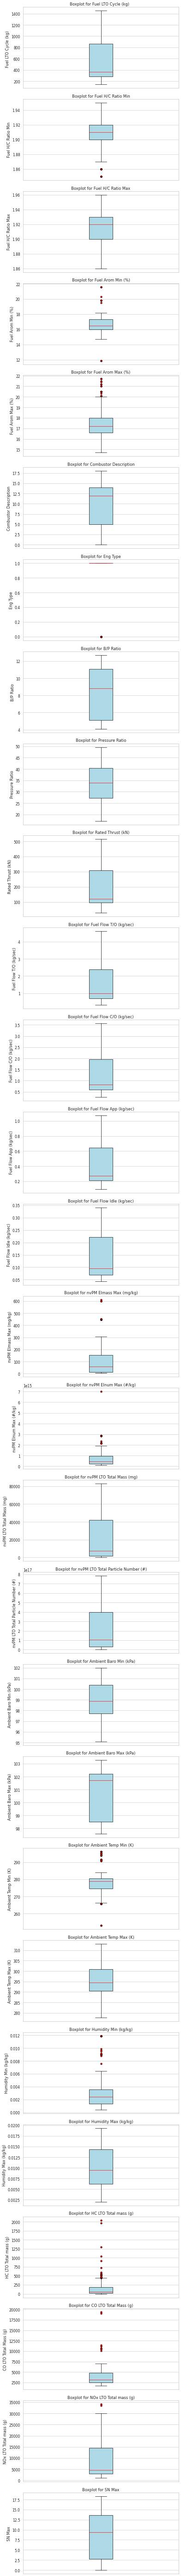

In [61]:
# Plot boxplots
fig, axes = plt.subplots(nrows=len(new_df.columns), figsize=(8, 4*len(new_df.columns)))

for col, ax in zip(new_df.columns, axes):
    ax.boxplot(new_df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red'), flierprops=dict(markerfacecolor='red', marker='o', markersize=5))
    ax.set_title(f'Boxplot for {col}')
    ax.set_ylabel(col)
    ax.set_xticks([])

plt.tight_layout()
plt.show()


Removing outliers can be beneficial or detrimental depending on the context, nature of the data, and the purpose of the analysis. Here's a brief overview:

**Benefits of Removing Outliers:**
1. **Improved Model Accuracy**: Outliers can skew and mislead the training process of machine learning algorithms, resulting in longer training times and less accurate models.
2. **Better Assumptions**: Many statistical techniques assume a normal distribution. Outliers can skew the dataset and make it difficult to meet this assumption.
3. **Improved Visualization**: Removing outliers can lead to improved data visualization, as key patterns might be more easily identifiable without extreme values.

**Reasons to Keep Outliers:**
1. **Valuable Information**: Sometimes, outliers can represent significant events or phenomena that are valuable to understand and should not be ignored (e.g., stock market crashes, rare diseases).
2. **Nature of Data**: In some fields, like finance or global weather patterns, data can inherently have significant outliers.
3. **Risk of Data Loss**: If there are too many outliers and you remove them, you risk losing a significant amount of data.

**Methods to Remove Outliers:**
1. **Z-Score**: It represents the number of standard deviations a data point is from the mean. Data points with a z-score above a threshold (e.g., 2 or 3) could be considered outliers.
2. **IQR (Interquartile Range) Method**: The IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile). Data points outside 1.5 times the IQR below the 1st quartile or above the 3rd quartile can be considered outliers.
3. **Domain-Specific Threshold**: Sometimes, domain expertise allows setting thresholds that define outliers.

**Recommendation:**
Before removing outliers, it's essential to understand the source of these outliers. Are they due to data entry errors, or do they represent actual extreme values? If you're unsure about the nature of the outliers, it might be beneficial to conduct two analyses: one with and one without outliers, and compare the results.

If you decide to proceed with outlier removal, I can assist you in implementing the methods mentioned. Let me know how you'd like to proceed!

#Model implementation

Splitting data for Model Implementation

In [62]:
from sklearn.model_selection import train_test_split

# Define features (X) and targets (y)

X = new_df.drop(columns=['nvPM EImass Max (mg/kg)', 'nvPM EInum Max (#/kg)',
                         'nvPM LTO Total Mass (mg)', 'nvPM LTO Total Particle Number (#)'])

y = new_df[['nvPM EImass Max (mg/kg)', 'nvPM EInum Max (#/kg)',
            'nvPM LTO Total Mass (mg)', 'nvPM LTO Total Particle Number (#)']]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((168, 24), (42, 24), (168, 4), (42, 4))

We have split the data in 80/20 for training & testing respectively

Linear Regression Models

In [63]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the models
models = {
    'Multitarget Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], store_cv_values=True),
}

# Store results for each model
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train['nvPM EImass Max (mg/kg)'])

    # Predict on the test set
    predictions = model.predict(X_test)

    # Compute evaluation metrics
    mse = mean_squared_error(y_test['nvPM EImass Max (mg/kg)'], predictions)
    mae = mean_absolute_error(y_test['nvPM EImass Max (mg/kg)'], predictions)
    r2 = r2_score(y_test['nvPM EImass Max (mg/kg)'], predictions)

    # Store results
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

results_df = pd.DataFrame(results).T
results_df


,MSE,MAE,R-squared
Multitarget Regression,1554.318168,27.974942,0.868250
Ridge Regression,1277.230376,24.852575,0.891737


Tree based regressor models

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# initialize the models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Reset the results dictionary
results = {}

# Train and evaluate each model again
for name, model in models.items():
    # Train the model for the target 'nvPM EImass Max (mg/kg)'
    model.fit(X_train, y_train['nvPM EImass Max (mg/kg)'])

    # Predict on the test set
    predictions = model.predict(X_test)

    # Compute evaluation metrics
    mse = mean_squared_error(y_test['nvPM EImass Max (mg/kg)'], predictions)
    mae = mean_absolute_error(y_test['nvPM EImass Max (mg/kg)'], predictions)
    r2 = r2_score(y_test['nvPM EImass Max (mg/kg)'], predictions)

    # Store results
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

results_df_tree_ensemble = pd.DataFrame(results).T
results_df_tree_ensemble



,MSE,MAE,R-squared
Decision Tree Regressor,272.683095,4.483333,0.976886
Random Forest Regressor,618.882958,8.500414,0.947541
Gradient Boosting Regressor,488.285553,5.327487,0.958611


K-nearest and SVM

In [65]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Initialize the models without chain regressor
models = {
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
}

# Store results for each model
results_chain = {}

# Train and evaluate each model for the target 'nvPM EImass Max (mg/kg)'
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train['nvPM EImass Max (mg/kg)'])

    # Predict on the test set
    predictions = model.predict(X_test)

    # Compute evaluation metrics
    mse = mean_squared_error(y_test['nvPM EImass Max (mg/kg)'], predictions)
    mae = mean_absolute_error(y_test['nvPM EImass Max (mg/kg)'], predictions)
    r2 = r2_score(y_test['nvPM EImass Max (mg/kg)'], predictions)

    # Store results
    results_chain[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

results_df_chain = pd.DataFrame(results_chain).T
results_df_chain



,MSE,MAE,R-squared
Support Vector Regression,15532.097763,79.287262,-0.316557
K-Nearest Neighbors Regression,7085.119895,47.432857,0.399439


Final Analysis : comparison of all models & their performance

In [66]:
# Adjusting the list of models to evaluate
models_to_evaluate = {
    'Multitarget Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Resetting the results dictionary
results_final_corrected = {}

# Train and evaluate each model for the target 'nvPM EImass Max (mg/kg)'
for name, model in models_to_evaluate.items():
    # Train the model
    model.fit(X_train, y_train['nvPM EImass Max (mg/kg)'])

    # Predict on the test set
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)

    # Compute evaluation metrics for test data
    mse_test = mean_squared_error(y_test['nvPM EImass Max (mg/kg)'], predictions_test)
    mae_test = mean_absolute_error(y_test['nvPM EImass Max (mg/kg)'], predictions_test)
    r2_test = r2_score(y_test['nvPM EImass Max (mg/kg)'], predictions_test)

    # Compute evaluation metrics for training data
    mse_train = mean_squared_error(y_train['nvPM EImass Max (mg/kg)'], predictions_train)
    mae_train = mean_absolute_error(y_train['nvPM EImass Max (mg/kg)'], predictions_train)
    r2_train = r2_score(y_train['nvPM EImass Max (mg/kg)'], predictions_train)

    # Store results
    results_final_corrected[name] = {'MSE train': mse_train, 'MAE train': mae_train, 'R-squared train': r2_train, 'MSE test': mse_test, 'MAE test': mae_test, 'R-squared test': r2_test}

results_df_final_corrected = pd.DataFrame(results_final_corrected).T
results_df_final_corrected



,MSE train,MAE train,R-squared train,MSE test,MAE test,R-squared test
Multitarget Regression,1235.502475,22.969209,0.918085,1554.318168,27.974942,0.868250
Decision Tree Regressor,0.013125,0.012500,0.999999,272.683095,4.483333,0.976886
Random Forest Regressor,319.069476,4.793129,0.978845,618.882958,8.500414,0.947541
Gradient Boosting Regressor,1.337434,0.812759,0.999911,488.285553,5.327487,0.958611


Visualization of result

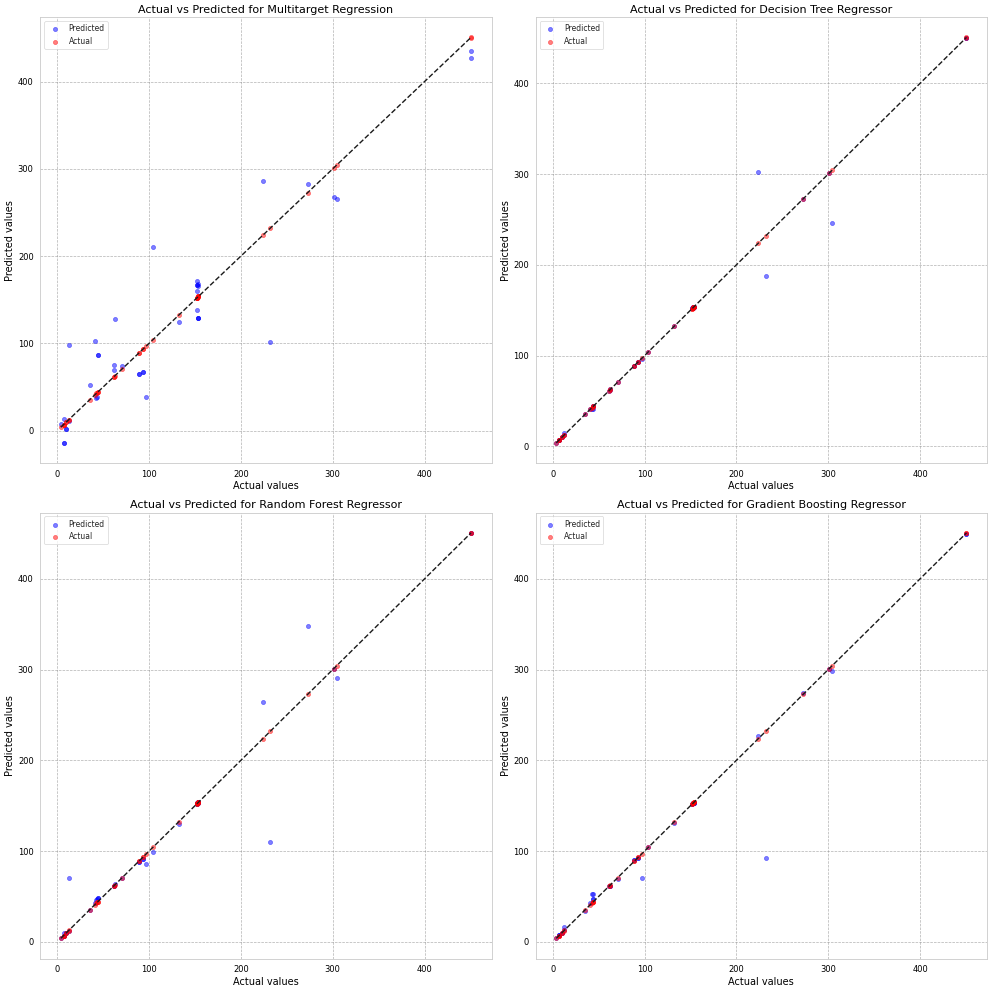

In [67]:
# plot the visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Loop through models and plot their results
for i, (name, model) in enumerate(models_to_evaluate.items()):
    row, col = i // 2, i % 2
    predictions = model.predict(X_test)

    # Plotting for the target variable 'nvPM EImass Max (mg/kg)'
    ax = axes[row, col]
    ax.scatter(y_test['nvPM EImass Max (mg/kg)'], predictions, alpha=0.5, color='blue', label='Predicted')
    ax.scatter(y_test['nvPM EImass Max (mg/kg)'], y_test['nvPM EImass Max (mg/kg)'], alpha=0.5, color='red', label='Actual')
    ax.set_title(f'Actual vs Predicted for {name}', color='black', fontsize=16)
    ax.set_xlabel('Actual values', color='black', fontsize=14)
    ax.set_ylabel('Predicted values', color='black', fontsize=14)
    ax.plot([y_test['nvPM EImass Max (mg/kg)'].min(), y_test['nvPM EImass Max (mg/kg)'].max()],
            [y_test['nvPM EImass Max (mg/kg)'].min(), y_test['nvPM EImass Max (mg/kg)'].max()], '--k', linewidth=2)
    ax.grid(True, linestyle='--', alpha=0.6, color='gray')
    ax.tick_params(axis='both', colors='black', labelsize=12)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()





The plots showcase the actual vs. predicted values for the target variable 'nvPM EImass Max (mg/kg)' for each of the models. A perfectly accurate model would result in all points lying on the red dashed line (y = x).

You can visually compare how close each model's predictions are to the actual values. From the plots, it seems that the Gradient Boosting Regressor and the Random Forest Regressor perform relatively well, as their predictions are closely aligned with the red dashed line.

In [68]:
# Initialize a dictionary to store the predictions for each model
predictions_dict = {}

# Train and evaluate each model for the target 'nvPM EImass Max (mg/kg)'
for name, model in models_to_evaluate.items():
    # Train the model
    model.fit(X_train, y_train['nvPM EImass Max (mg/kg)'])

    # Predict on the test set and store the predictions
    predictions_test = model.predict(X_test)
    predictions_dict[name] = predictions_test

# Create a DataFrame to compare actual vs. predicted values for Gradient Boosting Regressor
comparison_df_gb = pd.DataFrame({
    'Actual Values': y_test['nvPM EImass Max (mg/kg)'],
    'Predicted Values (Gradient Boosting)': predictions_dict['Gradient Boosting Regressor']
})

# Round the predicted values to two decimal places
comparison_df_gb['Predicted Values (Gradient Boosting)'] = comparison_df_gb['Predicted Values (Gradient Boosting)'].round(2)

comparison_df_gb.reset_index(drop=True, inplace=True)
comparison_df_gb.head()


,Actual Values,Predicted Values (Gradient Boosting)
0,70.8,69.19
1,153.7,153.07
2,304.3,298.46
3,152.5,152.62
4,43.9,47.69


In [69]:
comparison_df_gb.shape

(42, 2)

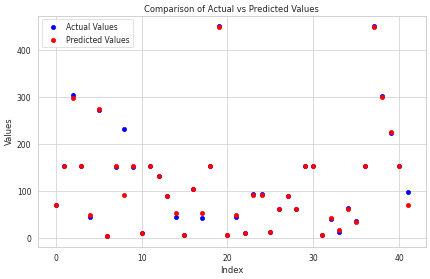

In [70]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df_gb.index, comparison_df_gb['Actual Values'], color='blue', label='Actual Values')
plt.scatter(comparison_df_gb.index, comparison_df_gb['Predicted Values (Gradient Boosting)'], color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()


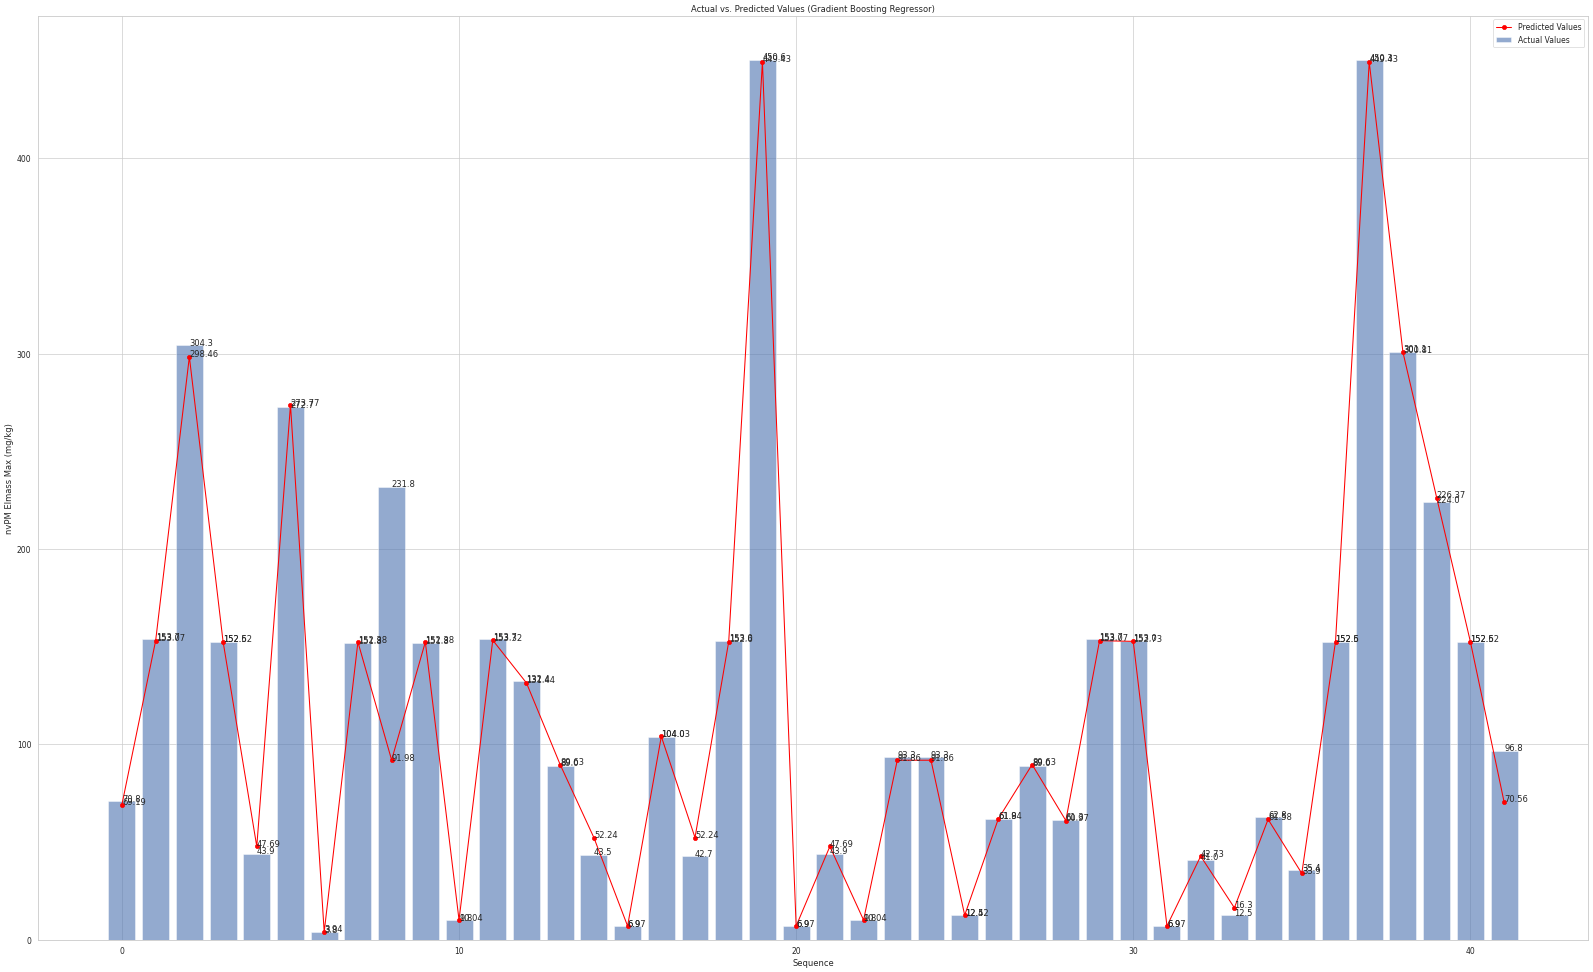

In [71]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(40, 24))
# Bar plot for actual values
plt.bar(range(len(comparison_df_gb['Actual Values'])), comparison_df_gb['Actual Values'], alpha=0.6, label='Actual Values')

# Line plot for predicted values
plt.plot(range(len(comparison_df_gb['Predicted Values (Gradient Boosting)'])), comparison_df_gb['Predicted Values (Gradient Boosting)'], color='red', label='Predicted Values', linestyle='-', marker='o')
# Add labels and title
plt.xlabel('Sequence')
plt.ylabel('nvPM EImass Max (mg/kg)')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')

# Annotate the plot with data points
for i, value in enumerate(comparison_df_gb['Actual Values']):
    plt.annotate(value, (i, value))

for i, value in enumerate(comparison_df_gb['Predicted Values (Gradient Boosting)']):
    plt.annotate(value, (i, value))

# Add a legend
plt.legend()

# Show the plot
plt.show()


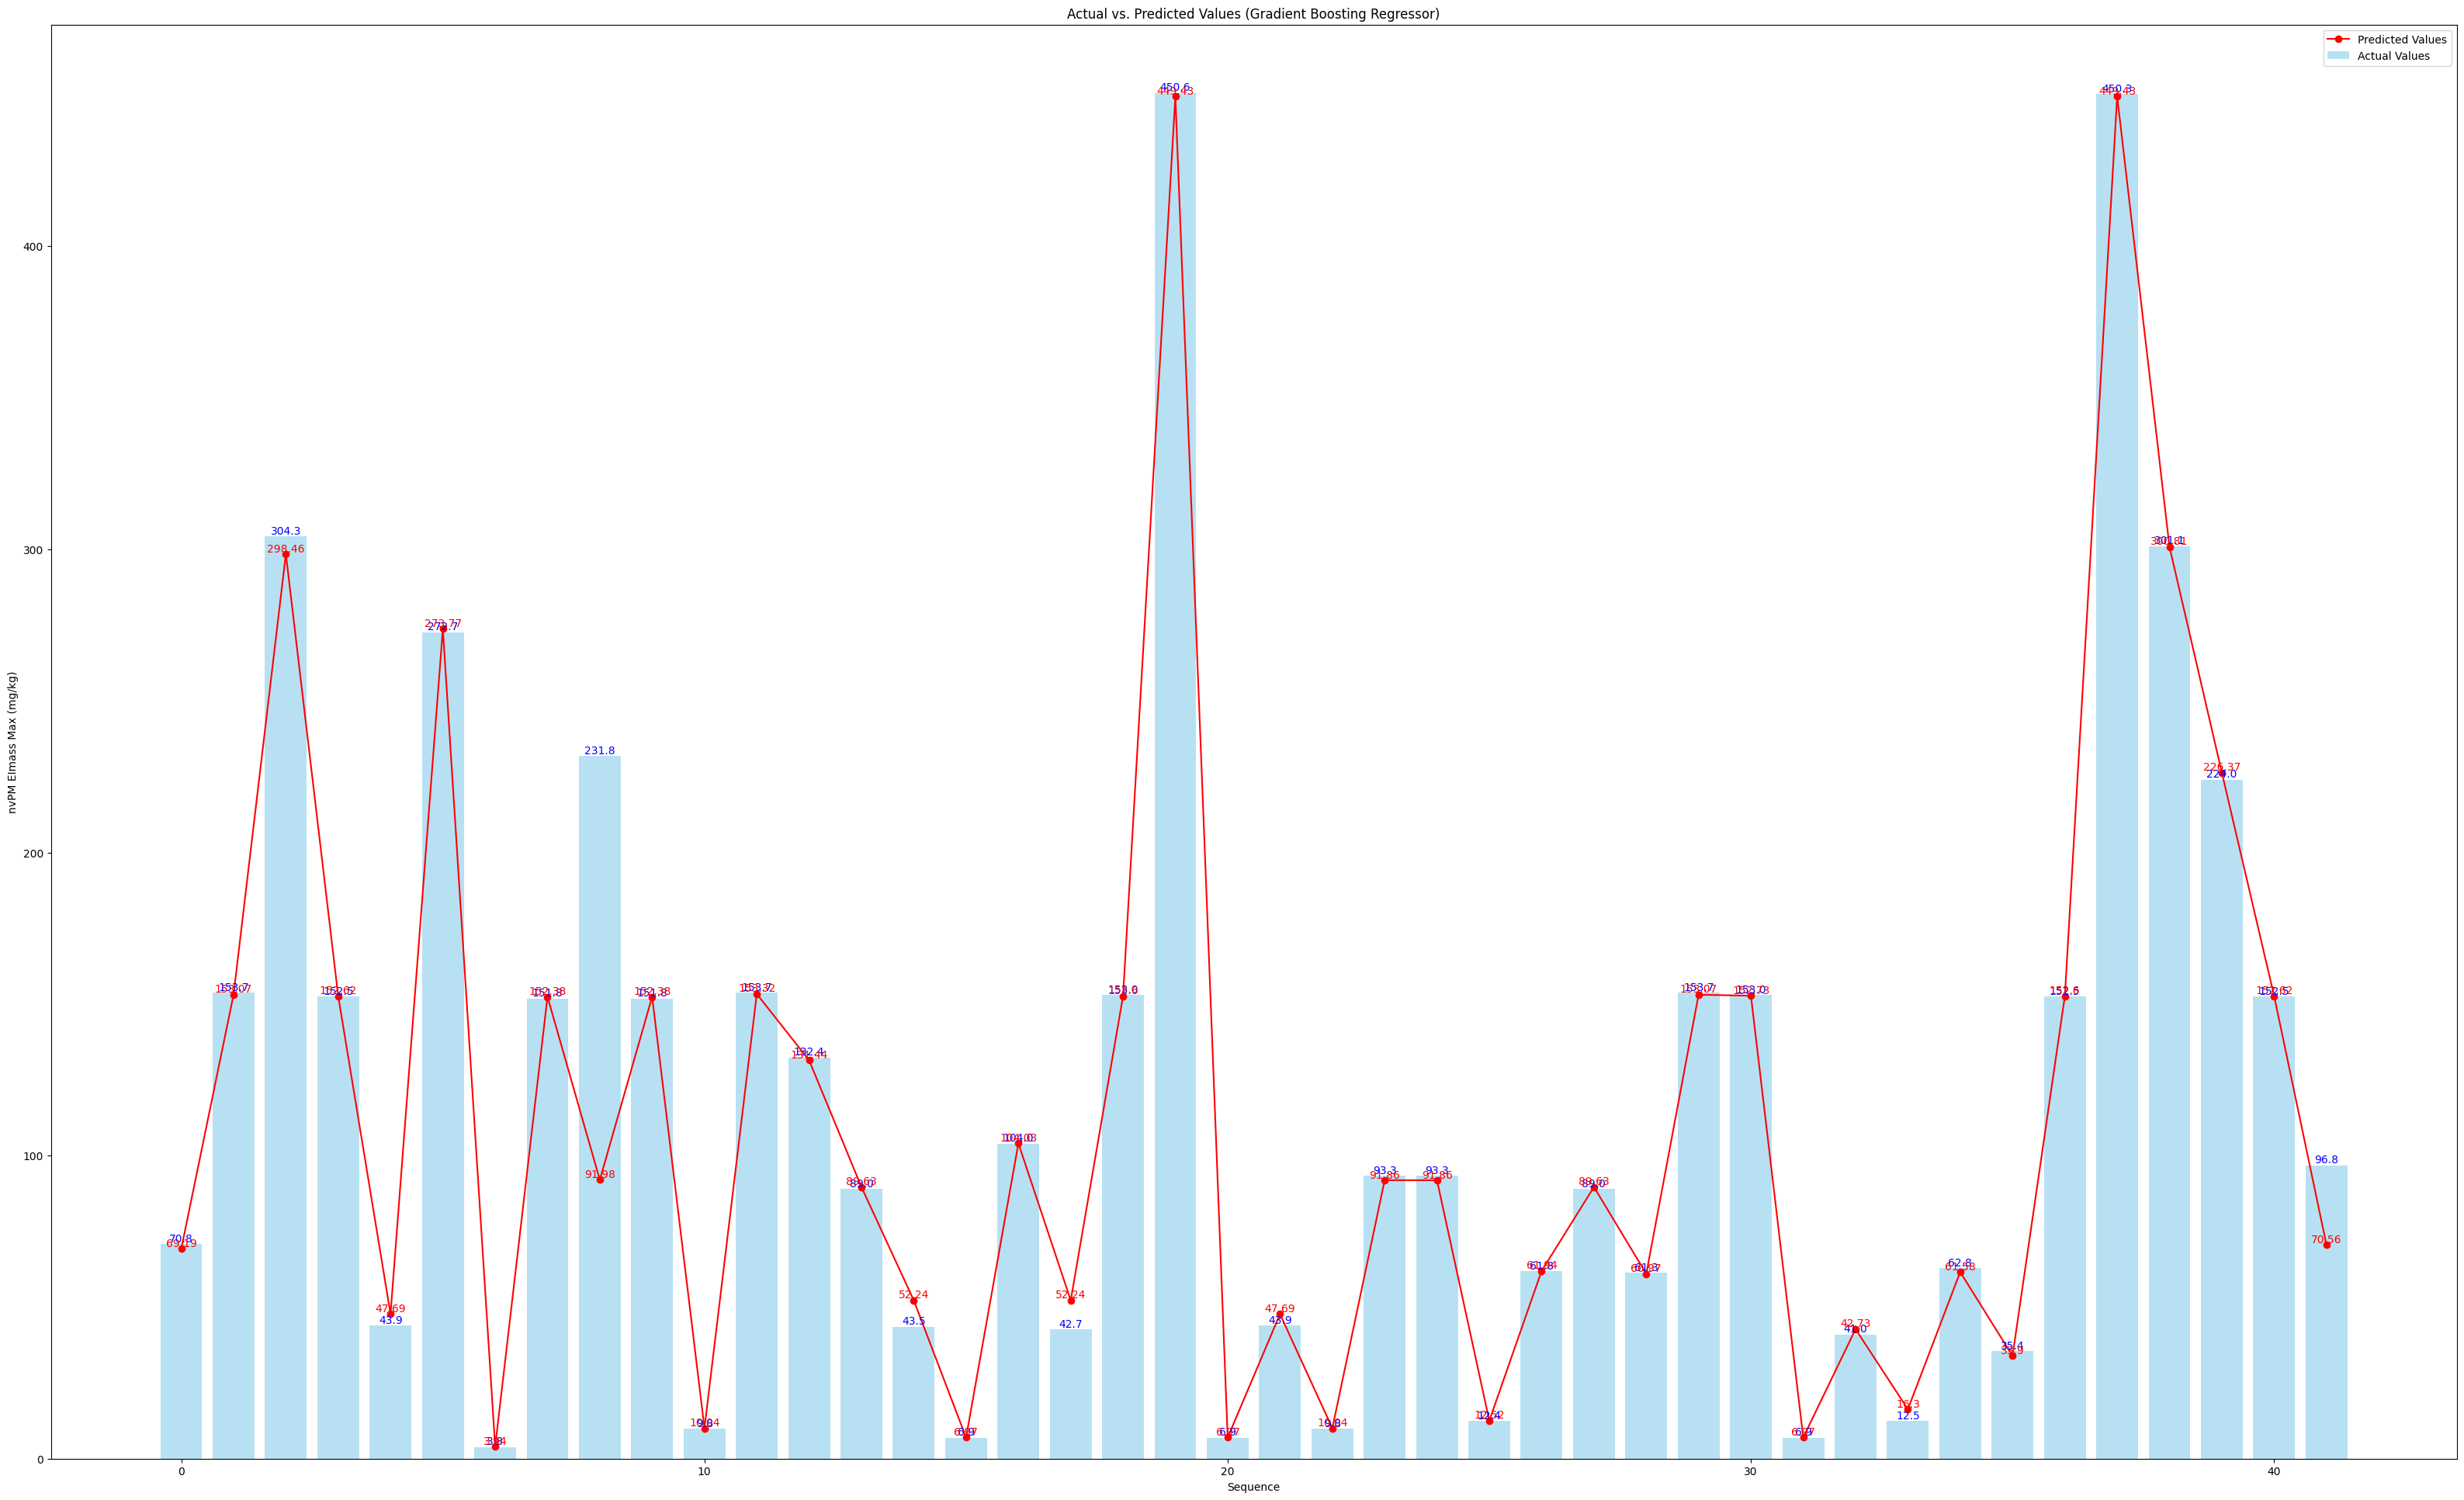

In [72]:
import matplotlib.pyplot as plt
plt.style.use('default')

# Create a line plot
plt.figure(figsize=(40, 24))

# Bar plot for actual values
bars = plt.bar(range(len(comparison_df_gb['Actual Values'])), comparison_df_gb['Actual Values'], alpha=0.6, label='Actual Values', color='skyblue')

# Line plot for predicted values
lines = plt.plot(range(len(comparison_df_gb['Predicted Values (Gradient Boosting)'])), comparison_df_gb['Predicted Values (Gradient Boosting)'], color='red', label='Predicted Values', linestyle='-', marker='o')

# Add labels and title
plt.xlabel('Sequence')
plt.ylabel('nvPM EImass Max (mg/kg)')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')

# Annotate the plot with data points
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), round(comparison_df_gb['Actual Values'].iloc[i], 2), ha='center', va='bottom', color='blue')

for i, line in enumerate(lines[0].get_xydata()):
    plt.text(line[0], line[1], round(comparison_df_gb['Predicted Values (Gradient Boosting)'].iloc[i], 2), ha='center', va='bottom', color='red')

# Add a legend
plt.legend()

# Show the plot
plt.show()


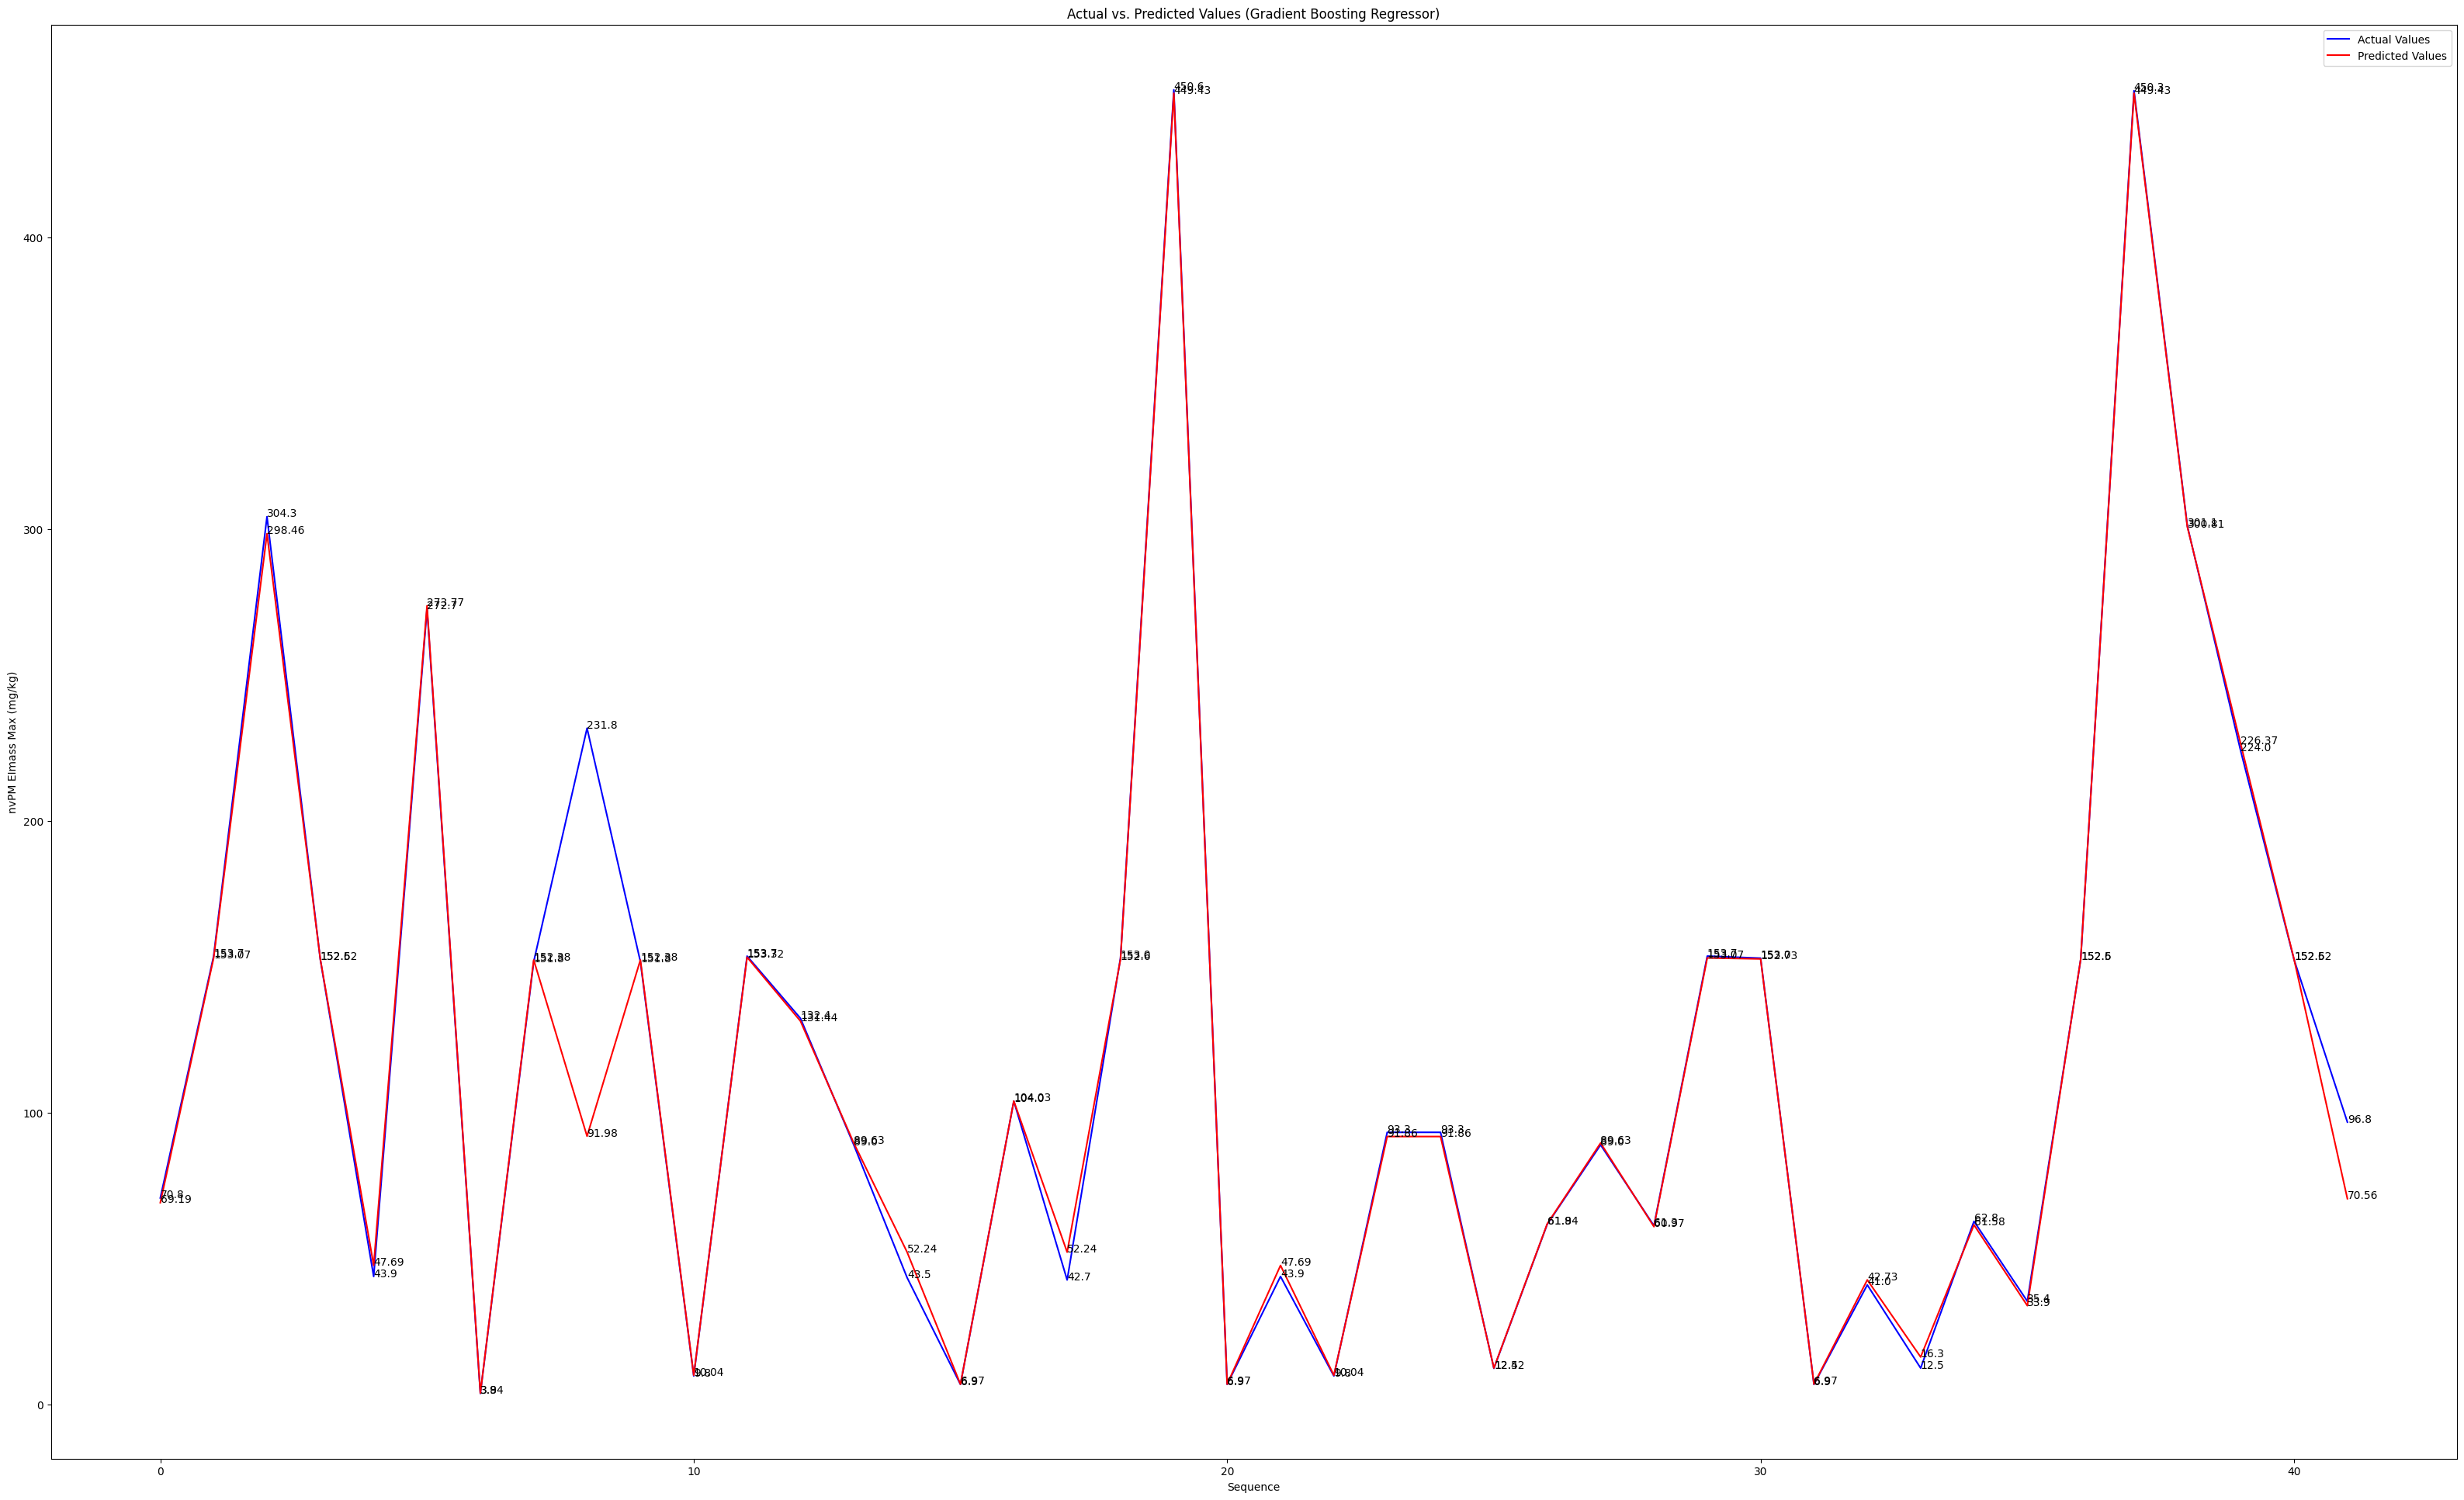

In [73]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(40, 24))
plt.plot(comparison_df_gb['Actual Values'], color='blue', label='Actual Values')
plt.plot(comparison_df_gb['Predicted Values (Gradient Boosting)'], color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('Sequence')
plt.ylabel('nvPM EImass Max (mg/kg)')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')

# Annotate the plot with data points
for i, value in enumerate(comparison_df_gb['Actual Values']):
    plt.annotate(value, (i, value))

for i, value in enumerate(comparison_df_gb['Predicted Values (Gradient Boosting)']):
    plt.annotate(value, (i, value))

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [74]:
# Initialize dictionaries to store the predictions for each model
predictions_dict_eimass = {}
predictions_dict_einum = {}

# Train and evaluate the Gradient Boosting Regressor for both target variables
gb_regressor_eimass = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor_eimass.fit(X_train, y_train['nvPM EImass Max (mg/kg)'])
predictions_test_eimass = gb_regressor_eimass.predict(X_test)
predictions_dict_eimass['Gradient Boosting Regressor'] = predictions_test_eimass

gb_regressor_einum = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor_einum.fit(X_train, y_train['nvPM EInum Max (#/kg)'])
predictions_test_einum = gb_regressor_einum.predict(X_test)
predictions_dict_einum['Gradient Boosting Regressor'] = predictions_test_einum

# Create a DataFrame to compare actual vs. predicted values for Gradient Boosting Regressor for both targets
comparison_df_gb_multi_target = pd.DataFrame({
    'Actual Values EImass': y_test['nvPM EImass Max (mg/kg)'],
    'Predicted Values EImass (Gradient Boosting)': predictions_dict_eimass['Gradient Boosting Regressor'],
    'Actual Values EInum': y_test['nvPM EInum Max (#/kg)'],
    'Predicted Values EInum (Gradient Boosting)': predictions_dict_einum['Gradient Boosting Regressor']
})

comparison_df_gb_multi_target.reset_index(drop=True, inplace=True)
comparison_df_gb_multi_target.head()


,Actual Values EImass,Predicted Values EImass (Gradient Boosting),Actual Values EInum,Predicted Values EInum (Gradient Boosting)
0,70.8,69.190466,4.330000e+14,4.362507e+14
1,153.7,153.072510,9.720000e+14,9.693850e+14
2,304.3,298.458237,2.200000e+15,2.176038e+15
3,152.5,152.618790,9.620000e+14,9.663752e+14
4,43.9,47.687689,3.720000e+14,3.711048e+14


Barplot Visualization.

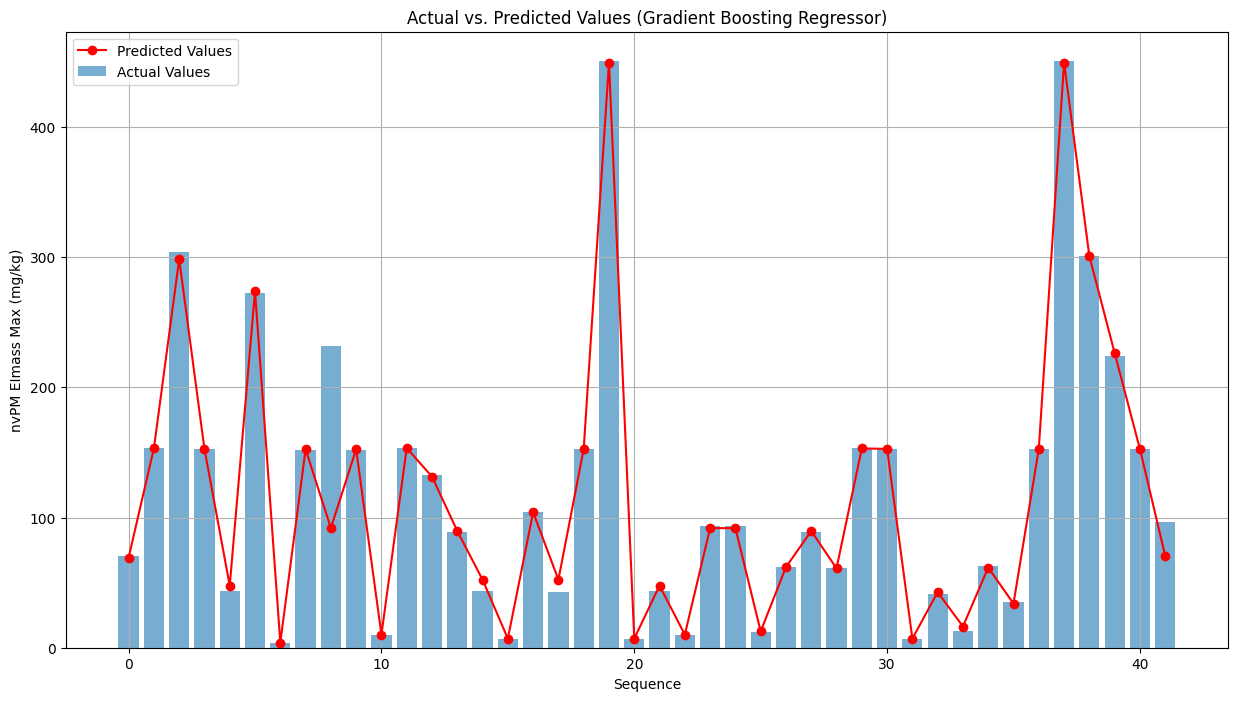

In [75]:
import matplotlib.pyplot as plt

# Assuming comparison_df_gb is your DataFrame with actual and predicted values
# Make sure you have the columns 'Actual Values' and 'Predicted Values (Gradient Boosting)' in your DataFrame

# Creating a bar plot for actual values and a line plot for predicted values
plt.figure(figsize=(15, 8))

# Bar plot for actual values
plt.bar(range(len(comparison_df_gb['Actual Values'])), comparison_df_gb['Actual Values'], alpha=0.6, label='Actual Values')

# Line plot for predicted values
plt.plot(range(len(comparison_df_gb['Predicted Values (Gradient Boosting)'])), comparison_df_gb['Predicted Values (Gradient Boosting)'], color='red', label='Predicted Values', linestyle='-', marker='o')

plt.xlabel('Sequence')
plt.ylabel('nvPM EImass Max (mg/kg)')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.legend()
plt.grid(True)
plt.show()


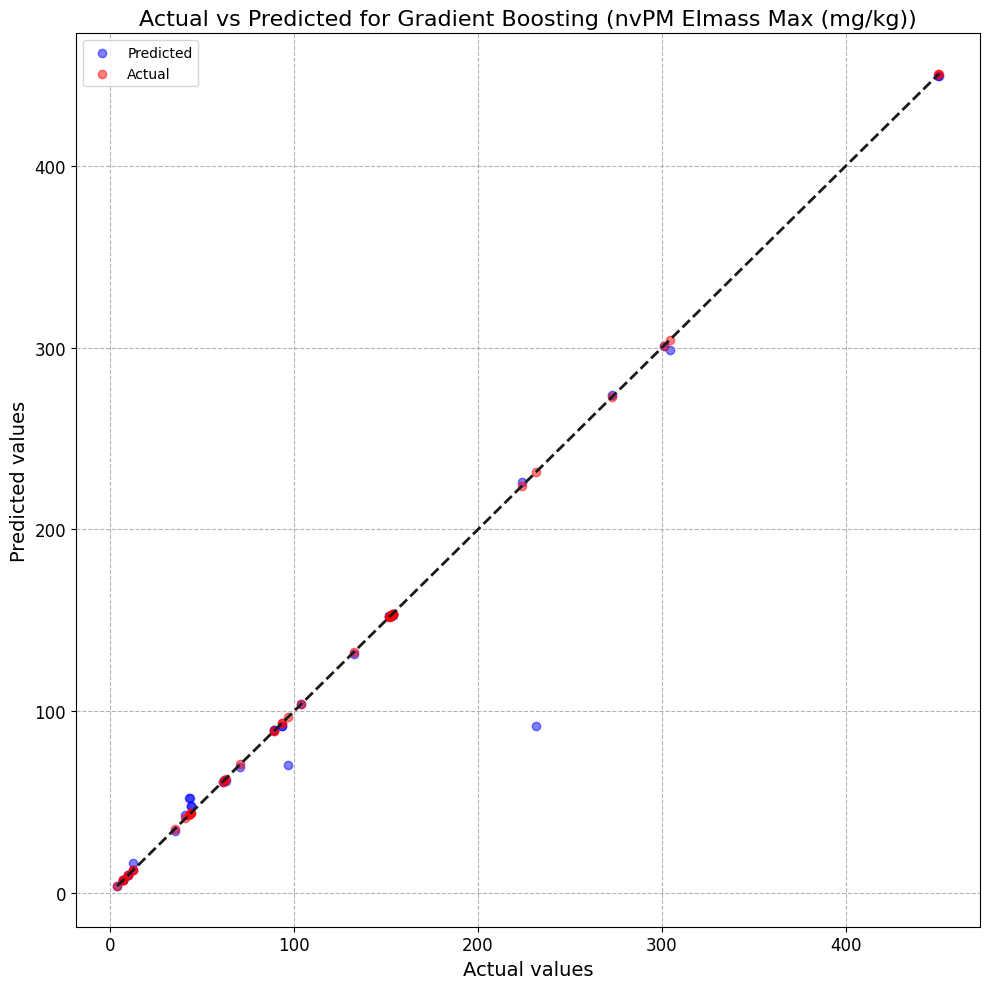

In [76]:
# figure for the Gradient Boosting model's target variable using the previously trained model
gb_model = models_to_evaluate['Gradient Boosting Regressor']

fig, ax = plt.subplots(figsize=(10, 10))

# Target variable
target = 'nvPM EImass Max (mg/kg)'

# Predict values using the test set
predictions = gb_model.predict(X_test)

# Scatter plot for actual vs. predicted values
ax.scatter(y_test[target], predictions, alpha=0.5, color='blue', label='Predicted')
ax.scatter(y_test[target], y_test[target], alpha=0.5, color='red', label='Actual')
ax.set_title(f'Actual vs Predicted for Gradient Boosting ({target})', color='black', fontsize=16)
ax.set_xlabel('Actual values', color='black', fontsize=14)
ax.set_ylabel('Predicted values', color='black', fontsize=14)
ax.plot([y_test[target].min(), y_test[target].max()],
        [y_test[target].min(), y_test[target].max()], '--k', linewidth=2)
ax.grid(True, linestyle='--', alpha=0.6, color='gray')
ax.tick_params(axis='both', colors='black', labelsize=12)
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Prediction of all Target variables

In [77]:
# Define and initialize the Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Using the Gradient Boosting Regressor to predict values for the entire dataset
all_predictions_entire_dataset = {}

# Train the model and predict values for each target on the entire dataset
for target in y.columns:
    gbr_model.fit(X_train, y_train[target])
    predictions_entire = gbr_model.predict(X)
    all_predictions_entire_dataset[target] = predictions_entire

# Convert the predictions dictionary to a dataframe
predicted_df_on_merged_data = pd.DataFrame(all_predictions_entire_dataset)

predicted_df_on_merged_data = predicted_df_on_merged_data.round(2)
predicted_df_on_merged_data.head()


,nvPM EImass Max (mg/kg),nvPM EInum Max (#/kg),nvPM LTO Total Mass (mg),nvPM LTO Total Particle Number (#)
0,43.32,6.439043e+14,3912.06,7.612121e+16
1,43.32,6.439043e+14,3912.06,7.612121e+16
2,41.71,6.475512e+14,3839.36,7.612121e+16
3,43.32,6.439043e+14,3912.06,7.612121e+16
4,44.40,5.993962e+14,4050.03,7.612121e+16


In [78]:
predicted_df_on_merged_data.shape

(210, 4)

In [79]:
# Merging the predicted values dataframe with the original dataset
merged_with_predictions_df = pd.concat([new_df.reset_index(drop=True), predicted_df_on_merged_data], axis=1, keys=['Original', 'Predicted'])

merged_with_predictions_df.head()


Original                                        \
  Fuel LTO Cycle (kg)   Fuel H/C Ratio Min Fuel H/C Ratio Max   
0                 157.0                1.9                1.9   
1                 156.0                1.9                1.9   
2                 151.0                1.9                1.9   
3                 157.0                1.9                1.9   
4                 165.0                1.9                1.9   

                                                                      \
  Fuel Arom Min (%) Fuel Arom Max (%) Combustor Description Eng Type   
0              16.0              20.0                    17        0   
1              16.0              20.0                    17        0   
2              16.0              20.0                    17        0   
3              16.0              20.0                    17        0   
4              16.0              20.0                    17        0   

                                              ...                       \
  B/P Ratio Pressure Ratio Rated Thrust (kN)  ... Humidity Min (kg/kg)   
0       4.8           18.0              34.9  ...                0.009   
1       4.8           17.9              34.7  ...                0.009   
2       4.8           17.2              33.1  ...                0.009   
3       4.8           17.9              34.7  ...                0.009   
4       4.7           19.1              37.2  ...                0.009   

                                                                    \
  Humidity Max (kg/kg) HC LTO Total mass (g) CO LTO Total Mass (g)   
0                0.012                 279.0                3088.0   
1                0.012                 280.0                3088.0   
2                0.012                 269.0                2919.0   
3                0.012                 280.0                3087.0   
4                0.012                 264.0                3018.0   

                                              Predicted                        \
  NOx LTO Total mass (g) SN Max nvPM EImass Max (mg/kg) nvPM EInum Max (#/kg)   
0                 1344.0    0.0                   43.32          6.439043e+14   
1                 1333.0    0.0                   43.32          6.439043e+14   
2                 1245.0    0.0                   41.71          6.475512e+14   
3                 1334.0    0.0                   43.32          6.439043e+14   
4                 1501.0    0.0                   44.40          5.993962e+14   

                                                               
  nvPM LTO Total Mass (mg) nvPM LTO Total Particle Number (#)  
0                  3912.06                       7.612121e+16  
1                  3912.06                       7.612121e+16  
2                  3839.36                       7.612121e+16  
3                  3912.06                       7.612121e+16  
4                  4050.03                       7.612121e+16  

[5 rows x 32 columns]

In [80]:
merged_with_predictions_df.to_csv('merged_with_predictions.csv', index=False)
from google.colab import files

# Define the file path
file_path = 'merged_with_predictions.csv'

# Save the dataframe to a CSV file
merged_with_predictions_df.to_csv(file_path, index=False)

# Download the file to your local machine
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediction for remaining data.

In [81]:
remaining_df.shape

(682, 105)

In [82]:
remaining_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 895
Columns: 105 entries, UID No to Remark 8
dtypes: float64(76), object(29)
memory usage: 564.8+ KB


In [83]:
# Columns you want to keep
columns_to_keep = ['Fuel LTO Cycle (kg)  ', 'Fuel H/C Ratio Min', 'Fuel H/C Ratio Max', 'Fuel Arom Min (%)',
                   'Fuel Arom Max (%)', 'Combustor Description', 'Eng Type', 'B/P Ratio',
                   'Pressure Ratio', 'Rated Thrust (kN)', 'Fuel Flow T/O (kg/sec)', 'Fuel Flow C/O (kg/sec)',
                   'Fuel Flow App (kg/sec)', 'Fuel Flow Idle (kg/sec)', 'Ambient Baro Min (kPa)', 'Ambient Baro Max (kPa)',
                   'Ambient Temp Min (K)', 'Ambient Temp Max (K)', 'Humidity Min (kg/kg)', 'Humidity Max (kg/kg)','HC LTO Total mass (g)','CO LTO Total Mass (g)','NOx LTO Total mass (g)','SN Max']

# Extract only the specified columns to create a new DataFrame
remaining_df = remaining_df[columns_to_keep]

In [84]:
remaining_df.shape

(682, 24)

In [85]:
import pandas as pd

# Check the missing values
missing_values_remaining = remaining_df.isnull().sum()

columns_with_missing_values_remaining = missing_values_remaining[missing_values_remaining > 0]

# Display column names and the sum of missing values
for column_name, missing_count in columns_with_missing_values_remaining.items():

    print(f"Column with missing values: {column_name}, Missing Values: {missing_count}")

Column with missing values: Fuel LTO Cycle (kg)  , Missing Values: 64
Column with missing values: Fuel H/C Ratio Min, Missing Values: 107
Column with missing values: Fuel H/C Ratio Max, Missing Values: 107
Column with missing values: Fuel Arom Min (%), Missing Values: 122
Column with missing values: Fuel Arom Max (%), Missing Values: 120
Column with missing values: Combustor Description, Missing Values: 250
Column with missing values: Eng Type, Missing Values: 63
Column with missing values: B/P Ratio, Missing Values: 71
Column with missing values: Pressure Ratio, Missing Values: 63
Column with missing values: Rated Thrust (kN), Missing Values: 63
Column with missing values: Fuel Flow T/O (kg/sec), Missing Values: 63
Column with missing values: Fuel Flow C/O (kg/sec), Missing Values: 63
Column with missing values: Fuel Flow App (kg/sec), Missing Values: 63
Column with missing values: Fuel Flow Idle (kg/sec), Missing Values: 64
Column with missing values: Ambient Baro Min (kPa), Missing 

In [86]:
# Check for categorical variables in the new_df dataframe
categorical_columns_remaining = remaining_df.select_dtypes(include=['object']).columns

# Creating list
categorical_columns_list_remaining = list(categorical_columns_remaining)
categorical_columns_list_remaining

['Combustor Description', 'Eng Type']

In [87]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns_list_remaining:
    remaining_df[col] = le.fit_transform(remaining_df[col])

# Check the first few rows of the dataframe after label encoding
encoded_label_df_head_remaining = remaining_df.head()
encoded_label_df_head_remaining

,Fuel LTO Cycle (kg),Fuel H/C Ratio Min,Fuel H/C Ratio Max,Fuel Arom Min (%),Fuel Arom Max (%),Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Ambient Baro Min (kPa),Ambient Baro Max (kPa),Ambient Temp Min (K),Ambient Temp Max (K),Humidity Min (kg/kg),Humidity Max (kg/kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g),SN Max
0,85.0,NaN,NaN,17.0,17.0,55,1,2.6,13.9,15.6,...,96.7,98.1,285.0,288.0,0.0066,0.0087,823.0,2612.0,630.0,NaN
1,92.0,NaN,NaN,17.0,17.0,55,1,2.6,14.3,16.5,...,97.0,97.3,294.0,313.0,0.0039,0.0073,393.0,2254.0,845.0,NaN
2,162.0,1.9,1.9,16.5,16.5,55,0,5.2,18.1,33.7,...,101.3,101.3,288.0,288.0,0.0063,0.0063,226.0,1468.0,1563.0,1.0
3,138.0,1.9,1.9,16.5,16.5,55,0,5.1,16.6,31.5,...,101.3,101.3,288.0,288.0,0.0063,0.0063,346.0,1850.0,1175.0,1.0
4,157.0,1.9,1.9,16.0,20.0,50,0,4.8,18.0,34.9,...,NaN,NaN,NaN,NaN,NaN,NaN,307.0,1865.0,1456.0,1.0


In [88]:
import pandas as pd

# Check the missing values
missing_values_remaining = remaining_df.isnull().sum()

columns_with_missing_values_remaining = missing_values_remaining[missing_values_remaining > 0]

# Display column names and the sum of missing values
for column_name, missing_count in columns_with_missing_values_remaining.items():

    print(f"Column with missing values: {column_name}, Missing Values: {missing_count}")

Column with missing values: Fuel LTO Cycle (kg)  , Missing Values: 64
Column with missing values: Fuel H/C Ratio Min, Missing Values: 107
Column with missing values: Fuel H/C Ratio Max, Missing Values: 107
Column with missing values: Fuel Arom Min (%), Missing Values: 122
Column with missing values: Fuel Arom Max (%), Missing Values: 120
Column with missing values: B/P Ratio, Missing Values: 71
Column with missing values: Pressure Ratio, Missing Values: 63
Column with missing values: Rated Thrust (kN), Missing Values: 63
Column with missing values: Fuel Flow T/O (kg/sec), Missing Values: 63
Column with missing values: Fuel Flow C/O (kg/sec), Missing Values: 63
Column with missing values: Fuel Flow App (kg/sec), Missing Values: 63
Column with missing values: Fuel Flow Idle (kg/sec), Missing Values: 64
Column with missing values: Ambient Baro Min (kPa), Missing Values: 102
Column with missing values: Ambient Baro Max (kPa), Missing Values: 102
Column with missing values: Ambient Temp Min

In [89]:
from sklearn.impute import SimpleImputer

# Dropping 'UID No' column
#remaining_df = remaining_df.drop(columns='UID No')

# Initializing a SimpleImputer for numerical columns (all columns are now numerical after encoding)
imputer = SimpleImputer(strategy='mean')

# Applying the imputer to the DataFrame
remaining_df_imputed = pd.DataFrame(imputer.fit_transform(remaining_df), columns=remaining_df.columns)

# Checking the first few rows of the dataframe after imputation
remaining_df_imputed.head()

,Fuel LTO Cycle (kg),Fuel H/C Ratio Min,Fuel H/C Ratio Max,Fuel Arom Min (%),Fuel Arom Max (%),Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Ambient Baro Min (kPa),Ambient Baro Max (kPa),Ambient Temp Min (K),Ambient Temp Max (K),Humidity Min (kg/kg),Humidity Max (kg/kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g),SN Max
0,85.0,1.900052,1.904313,17.0,17.0,55.0,1.0,2.6,13.9,15.6,...,96.700000,98.100000,285.000000,288.000000,0.006600,0.008700,823.0,2612.0,630.0,8.543987
1,92.0,1.900052,1.904313,17.0,17.0,55.0,1.0,2.6,14.3,16.5,...,97.000000,97.300000,294.000000,313.000000,0.003900,0.007300,393.0,2254.0,845.0,8.543987
2,162.0,1.900000,1.900000,16.5,16.5,55.0,0.0,5.2,18.1,33.7,...,101.300000,101.300000,288.000000,288.000000,0.006300,0.006300,226.0,1468.0,1563.0,1.000000
3,138.0,1.900000,1.900000,16.5,16.5,55.0,0.0,5.1,16.6,31.5,...,101.300000,101.300000,288.000000,288.000000,0.006300,0.006300,346.0,1850.0,1175.0,1.000000
4,157.0,1.900000,1.900000,16.0,20.0,50.0,0.0,4.8,18.0,34.9,...,98.841034,99.969828,281.780763,292.578109,0.004954,0.009083,307.0,1865.0,1456.0,1.000000


In [90]:
# Rounding the DataFrame to one decimal place
remaining_df_imputed = remaining_df_imputed.round(1)

# Checking the first few rows of the dataframe after imputation
remaining_df_imputed.head()

,Fuel LTO Cycle (kg),Fuel H/C Ratio Min,Fuel H/C Ratio Max,Fuel Arom Min (%),Fuel Arom Max (%),Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Ambient Baro Min (kPa),Ambient Baro Max (kPa),Ambient Temp Min (K),Ambient Temp Max (K),Humidity Min (kg/kg),Humidity Max (kg/kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g),SN Max
0,85.0,1.9,1.9,17.0,17.0,55.0,1.0,2.6,13.9,15.6,...,96.7,98.1,285.0,288.0,0.0,0.0,823.0,2612.0,630.0,8.5
1,92.0,1.9,1.9,17.0,17.0,55.0,1.0,2.6,14.3,16.5,...,97.0,97.3,294.0,313.0,0.0,0.0,393.0,2254.0,845.0,8.5
2,162.0,1.9,1.9,16.5,16.5,55.0,0.0,5.2,18.1,33.7,...,101.3,101.3,288.0,288.0,0.0,0.0,226.0,1468.0,1563.0,1.0
3,138.0,1.9,1.9,16.5,16.5,55.0,0.0,5.1,16.6,31.5,...,101.3,101.3,288.0,288.0,0.0,0.0,346.0,1850.0,1175.0,1.0
4,157.0,1.9,1.9,16.0,20.0,50.0,0.0,4.8,18.0,34.9,...,98.8,100.0,281.8,292.6,0.0,0.0,307.0,1865.0,1456.0,1.0


In [91]:

# Extracting the Gradient Boosting Regressor model
gb_regressor = models_to_evaluate['Gradient Boosting Regressor']

# Making predictions with the Gradient Boosting Regressor model
predictions_remaining_df = gb_regressor.predict(remaining_df_imputed)

# Optionally, create a DataFrame to view the predictions
predictions_df = pd.DataFrame(predictions_remaining_df, columns=['Predicted Values'])

predictions_df = predictions_df.round(2)

predictions_df.head()


,Predicted Values
0,256.30
1,234.19
2,11.46
3,30.61
4,76.19


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Define your target variables
target_variables = ['nvPM EImass Max (mg/kg)', 'nvPM EInum Max (#/kg)',
                    'nvPM LTO Total Mass (mg)', 'nvPM LTO Total Particle Number (#)']

# Train the model and predict values for each target on remaining_df_imputed
all_predictions_remaining_df = {}

for target in target_variables:
    gbr_model.fit(X_train, y_train[target])
    predictions_remaining = gbr_model.predict(remaining_df_imputed)
    all_predictions_remaining_df[target] = predictions_remaining

# Convert the predictions dictionary to a dataframe
predicted_df_remaining = pd.DataFrame(all_predictions_remaining_df)

predicted_df_remaining = predicted_df_remaining.round(2)

predicted_df_remaining.head()


,nvPM EImass Max (mg/kg),nvPM EInum Max (#/kg),nvPM LTO Total Mass (mg),nvPM LTO Total Particle Number (#)
0,256.30,3.458029e+15,4861.15,7.425744e+16
1,234.19,3.285102e+15,4438.52,7.843163e+16
2,11.46,3.623600e+14,1104.34,4.263493e+16
3,30.61,3.571418e+14,-107.98,4.170207e+16
4,76.19,1.999647e+15,2779.61,5.643061e+16


In [93]:
predicted_df_remaining.shape

(682, 4)

In [94]:
# Merging the predicted values dataframe with the original dataset
predictions_df_merged_gaseous = pd.concat([remaining_df_imputed.reset_index(drop=True), predicted_df_remaining], axis=1)

predictions_df_merged_gaseous.head()

,Fuel LTO Cycle (kg),Fuel H/C Ratio Min,Fuel H/C Ratio Max,Fuel Arom Min (%),Fuel Arom Max (%),Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Humidity Min (kg/kg),Humidity Max (kg/kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g),SN Max,nvPM EImass Max (mg/kg),nvPM EInum Max (#/kg),nvPM LTO Total Mass (mg),nvPM LTO Total Particle Number (#)
0,85.0,1.9,1.9,17.0,17.0,55.0,1.0,2.6,13.9,15.6,...,0.0,0.0,823.0,2612.0,630.0,8.5,256.30,3.458029e+15,4861.15,7.425744e+16
1,92.0,1.9,1.9,17.0,17.0,55.0,1.0,2.6,14.3,16.5,...,0.0,0.0,393.0,2254.0,845.0,8.5,234.19,3.285102e+15,4438.52,7.843163e+16
2,162.0,1.9,1.9,16.5,16.5,55.0,0.0,5.2,18.1,33.7,...,0.0,0.0,226.0,1468.0,1563.0,1.0,11.46,3.623600e+14,1104.34,4.263493e+16
3,138.0,1.9,1.9,16.5,16.5,55.0,0.0,5.1,16.6,31.5,...,0.0,0.0,346.0,1850.0,1175.0,1.0,30.61,3.571418e+14,-107.98,4.170207e+16
4,157.0,1.9,1.9,16.0,20.0,50.0,0.0,4.8,18.0,34.9,...,0.0,0.0,307.0,1865.0,1456.0,1.0,76.19,1.999647e+15,2779.61,5.643061e+16


In [95]:

# Extracting column names from the cleaned dataframe
column_names = predictions_df_merged_gaseous.columns
column_names

for col_name in column_names:
    print(col_name)

Fuel LTO Cycle (kg)  
Fuel H/C Ratio Min
Fuel H/C Ratio Max
Fuel Arom Min (%)
Fuel Arom Max (%)
Combustor Description
Eng Type
B/P Ratio
Pressure Ratio
Rated Thrust (kN)
Fuel Flow T/O (kg/sec)
Fuel Flow C/O (kg/sec)
Fuel Flow App (kg/sec)
Fuel Flow Idle (kg/sec)
Ambient Baro Min (kPa)
Ambient Baro Max (kPa)
Ambient Temp Min (K)
Ambient Temp Max (K)
Humidity Min (kg/kg)
Humidity Max (kg/kg)
HC LTO Total mass (g)
CO LTO Total Mass (g)
NOx LTO Total mass (g)
SN Max
nvPM EImass Max (mg/kg)
nvPM EInum Max (#/kg)
nvPM LTO Total Mass (mg)
nvPM LTO Total Particle Number (#)


In [96]:
predictions_df_merged_gaseous.to_csv('predictions_df_merged_gaseous.csv', index=False)
from google.colab import files

# Define the file path
file_path = 'predictions_df_merged_gaseous.csv'

# Save the dataframe to a CSV file
predictions_df_merged_gaseous.to_csv(file_path, index=False)

# Download the file to your local machine
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>